# **Problem Statement**

We are working as a data analyst in a company called Fast Cars. Fast Cars is a cab agglomerator like Uber and Ola i.e. it connects passengers to cabs in cities for travel through an app.

They are going to launch their product in New York City. But before they want to understand the new york taxi market.

As a data analyst you are provided with a Yellow Taxi dataset which contains information about taxis that people took in New York city from streets. 

You are asked to analyse this data to provide insights about the taxi market of new york.

Do a short and preliminary analysis on the data.

You can find the data and the relevant information about Yellow Taxi dataset here - https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page 

# **Data identification and collection**

As this is a short and preliminary analysis, so we will be focussing on only 1 month of data for analysis.

viz. 2018 january.

The data is collected from the above website mentioned

# **Data Cleaning and Manipulation**

The first stage in any EDA problem solving strategy is Data cleaning and Manipulation stage.

**Data Cleaning and Manipulation Steps**

> Data Understanding

- Reading Dataset documentation
- Importing data - understanding each column data
- Data Summarisation like Check data type of columns, number of rows etc.

> Data Cleaning

- Dropping irrelevant columns
- Renaming the columns
- Dropping the duplicate rows 
- Dropping or handling missing values
- Dropping invalid data rows (Also check if column have correct data type)
- Detecting and handling outliers (this can be handled in data analysis part as well)


> Data Manipulation

- Column transformation
- Joining datasets
- other manipulation like pivoting or transposing (this is also applied in  data analysis part)

## Data Understanding

### Reading data documentation

In the website - https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

there is data about yellow taxis in csv format categorised by each year and month.

There is data dictionary pdf as well mentioned in the website called `Yellow Trips Data Dictionary`

By looking at data_description file we find that following columns would be useful for our analysis:(you can find the data description file here - https://drive.google.com/file/d/1B6JUAqGNmaMfyc6TQqxRWrvOVI1DtgQf/view?usp=sharing)<br>
* tpep_pickup_datetime - The date and time when the meter was engaged. 
* tpep_dropoff_datetime - The date and time when the meter was disengaged.
* Passenger_count - The number of passengers in the vehicle. 
* Trip_distance - The elapsed trip distance in miles reported by the taximeter.
* PULocationID - TLC Taxi Zone in which the taximeter was engaged
* DOLocationID - TLC Taxi Zone in which the taximeter was disengaged
* Payment_type - A numeric code signifying how the passenger paid for the trip. 
* Fare_amount - The time-and-distance fare calculated by the meter.
* Extra - Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
* MTA_tax - \\$ 0.50 MTA tax that is automatically triggered based on the metered rate in use.
* Improvement_surcharge - \\$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
* congestion_surcharge - fees on congestion
* Tip_amount - This field is automatically populated for credit card tips. Cash tips are not included.
* Tolls_amount - Total amount of all tolls paid in trip.
* Total_amount -  The total amount charged to passengers. Does not include cash tips.

And we will drop the following columns:<br>
* VendorID
* RateCodeID 
* Store_and_fwd_flag

For more details about each column value or the data available please look at the file attached to the link of `Trip Record User Guide`

We also have `taxi+_zone_lookup.csv` file where the zone ID mentioned in the columns `PULocationID` and `DOLocationID` are mapped to their respective locations.

### Importing the data

In [1]:
# import important libraries - matplotlib, seaborn and pandas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# yellow taxi data
file_loc = '/content/drive/MyDrive/Data Science by Onelearn/EDA/Taxi Data Analysis/yellow_tripdata_june2020.csv'

# read file
trip_data = pd.read_csv(file_loc)
trip_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2020-06-01 00:31:23   2020-06-01 00:49:58              1.0   
1       1.0  2020-06-01 00:42:50   2020-06-01 01:04:33              1.0   
2       1.0  2020-06-01 00:39:51   2020-06-01 00:49:09              1.0   
3       1.0  2020-06-01 00:56:13   2020-06-01 01:11:38              1.0   
4       1.0  2020-06-01 00:16:41   2020-06-01 00:29:30              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            3.6         1.0                  N           140            68   
1            5.6         1.0                  N            79           226   
2            2.3         1.0                  N           238           116   
3            5.3         1.0                  N           141           116   
4            4.4         1.0                  N           186            75   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           1.0         15.5    3.0      0.5        4.00           0.0   
1           1.0         19.5    3.0      0.5        2.00           0.0   
2           2.0         10.0    0.5      0.5        0.00           0.0   
3           2.0         17.5    3.0      0.5        0.00           0.0   
4           1.0         14.5    3.0      0.5        3.65           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  
0                    0.3         23.30                   2.5  
1                    0.3         25.30                   2.5  
2                    0.3         11.30                   0.0  
3                    0.3         21.30                   2.5  
4                    0.3         21.95                   2.5

In [5]:
# taxi zone lookup file
file_loc_2 = '/content/drive/MyDrive/Data Science by Onelearn/EDA/Taxi Data Analysis/taxi+_zone_lookup.csv'

#zone look up file 
taxi_zone_data = pd.read_csv(file_loc_2)
taxi_zone_data.head()

LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone

### Data Summarisation

In [ ]:
trip_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2020-06-01 00:31:23   2020-06-01 00:49:58              1.0   
1       1.0  2020-06-01 00:42:50   2020-06-01 01:04:33              1.0   
2       1.0  2020-06-01 00:39:51   2020-06-01 00:49:09              1.0   
3       1.0  2020-06-01 00:56:13   2020-06-01 01:11:38              1.0   
4       1.0  2020-06-01 00:16:41   2020-06-01 00:29:30              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            3.6         1.0                  N           140            68   
1            5.6         1.0                  N            79           226   
2            2.3         1.0                  N           238           116   
3            5.3         1.0                  N           141           116   
4            4.4         1.0                  N           186            75   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           1.0         15.5    3.0      0.5        4.00           0.0   
1           1.0         19.5    3.0      0.5        2.00           0.0   
2           2.0         10.0    0.5      0.5        0.00           0.0   
3           2.0         17.5    3.0      0.5        0.00           0.0   
4           1.0         14.5    3.0      0.5        3.65           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  
0                    0.3         23.30                   2.5  
1                    0.3         25.30                   2.5  
2                    0.3         11.30                   0.0  
3                    0.3         21.30                   2.5  
4                    0.3         21.95                   2.5

In [ ]:
trip_data.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
549755       NaN  2020-06-30 23:05:00   2020-06-30 23:32:00              NaN   
549756       NaN  2020-06-30 23:21:47   2020-06-30 23:25:24              NaN   
549757       NaN  2020-06-30 23:34:00   2020-06-30 23:44:00              NaN   
549758       NaN  2020-06-30 23:22:47   2020-06-30 23:42:01              NaN   
549759       NaN  2020-06-30 23:56:18   2020-07-01 00:27:19              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
549755          12.96         NaN                NaN            17   
549756           0.36         NaN                NaN            41   
549757           2.36         NaN                NaN           242   
549758           5.50         NaN                NaN            14   
549759           9.59         NaN                NaN            61   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
549755            69           NaN        32.91    0.0      0.5        2.75   
549756            41           NaN        11.45    0.0      0.5        2.75   
549757            81           NaN        18.45    0.0      0.5        2.75   
549758           118           NaN        15.90    0.0      0.5        6.23   
549759           137           NaN        29.68    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
549755          6.12                    0.3         42.58   
549756          0.00                    0.3         15.00   
549757          0.00                    0.3         22.00   
549758         12.24                    0.3         35.17   
549759          0.00                    0.3         32.98   

        congestion_surcharge  
549755                   0.0  
549756                   0.0  
549757                   0.0  
549758                   0.0  
549759                   2.5

In [6]:
print(trip_data.shape)

(549760, 18)


In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549760 entries, 0 to 549759
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               499043 non-null  float64
 1   tpep_pickup_datetime   549760 non-null  object 
 2   tpep_dropoff_datetime  549760 non-null  object 
 3   passenger_count        499043 non-null  float64
 4   trip_distance          549760 non-null  float64
 5   RatecodeID             499043 non-null  float64
 6   store_and_fwd_flag     499043 non-null  object 
 7   PULocationID           549760 non-null  int64  
 8   DOLocationID           549760 non-null  int64  
 9   payment_type           499043 non-null  float64
 10  fare_amount            549760 non-null  float64
 11  extra                  549760 non-null  float64
 12  mta_tax                549760 non-null  float64
 13  tip_amount             549760 non-null  float64
 14  tolls_amount           549760 non-nu

## Data Cleaning and Manipulation Steps (Reading Assignment)

We have done all the data cleaning and manipulation steps below though we have not followed the exact cleaning steps methodically as mentioned at the start.

These are the cleaning that we have done
* Dropped 3 columns `'VendorID','RatecodeID','store_and_fwd_flag'`
* converted pickup and dropoff column data type to datetime
* Extracted trip day from the pickup datetime column
* Extracted pickup hour and dropoff hour also from the above datetime columns
* calculated duration value from it
* checked for missing values
* converted payment type value from integer to string (based on mapping given in data dictionary file)
* combined the three tax values (mta_tax , extra, improvement_surcharge) into one single value called total_taxes.

In [7]:
# remove following columns - 'VendorID','RatecodeID','store_and_fwd_flag'
trip_data.drop(['VendorID','RatecodeID','store_and_fwd_flag'],axis=1,inplace=True)
# print data head
trip_data.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-06-01 00:31:23   2020-06-01 00:49:58              1.0            3.6   
1  2020-06-01 00:42:50   2020-06-01 01:04:33              1.0            5.6   
2  2020-06-01 00:39:51   2020-06-01 00:49:09              1.0            2.3   
3  2020-06-01 00:56:13   2020-06-01 01:11:38              1.0            5.3   
4  2020-06-01 00:16:41   2020-06-01 00:29:30              1.0            4.4   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           140            68           1.0         15.5    3.0      0.5   
1            79           226           1.0         19.5    3.0      0.5   
2           238           116           2.0         10.0    0.5      0.5   
3           141           116           2.0         17.5    3.0      0.5   
4           186            75           1.0         14.5    3.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        4.00           0.0                    0.3         23.30   
1        2.00           0.0                    0.3         25.30   
2        0.00           0.0                    0.3         11.30   
3        0.00           0.0                    0.3         21.30   
4        3.65           0.0                    0.3         21.95   

   congestion_surcharge  
0                   2.5  
1                   2.5  
2                   0.0  
3                   2.5  
4                   2.5

We will now deal with time related columns, we have two time related columns
* tpep_pickup_datetime 
* tpep_dropoff_datetime

We will first convert these column to datatime data type of pandas.

we will create three different features from these  
* hour - pickup hour and dropoff hour
* day name - this is basically the day of the week when trip took place - we will only take day name from pickup date.
( as day name for drop date is supposed to be same as pickup date)
* duration of trip

In [8]:
# convert 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' to datetime format
trip_data['tpep_pickup_datetime'] = pd.to_datetime(trip_data['tpep_pickup_datetime'])
trip_data['tpep_dropoff_datetime'] = pd.to_datetime(trip_data['tpep_dropoff_datetime'])
# print data info
print(trip_data.info())
# print data head
trip_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549760 entries, 0 to 549759
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   tpep_pickup_datetime   549760 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  549760 non-null  datetime64[ns]
 2   passenger_count        499043 non-null  float64       
 3   trip_distance          549760 non-null  float64       
 4   PULocationID           549760 non-null  int64         
 5   DOLocationID           549760 non-null  int64         
 6   payment_type           499043 non-null  float64       
 7   fare_amount            549760 non-null  float64       
 8   extra                  549760 non-null  float64       
 9   mta_tax                549760 non-null  float64       
 10  tip_amount             549760 non-null  float64       
 11  tolls_amount           549760 non-null  float64       
 12  improvement_surcharge  549760 non-null  floa

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-06-01 00:31:23   2020-06-01 00:49:58              1.0            3.6   
1  2020-06-01 00:42:50   2020-06-01 01:04:33              1.0            5.6   
2  2020-06-01 00:39:51   2020-06-01 00:49:09              1.0            2.3   
3  2020-06-01 00:56:13   2020-06-01 01:11:38              1.0            5.3   
4  2020-06-01 00:16:41   2020-06-01 00:29:30              1.0            4.4   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           140            68           1.0         15.5    3.0      0.5   
1            79           226           1.0         19.5    3.0      0.5   
2           238           116           2.0         10.0    0.5      0.5   
3           141           116           2.0         17.5    3.0      0.5   
4           186            75           1.0         14.5    3.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        4.00           0.0                    0.3         23.30   
1        2.00           0.0                    0.3         25.30   
2        0.00           0.0                    0.3         11.30   
3        0.00           0.0                    0.3         21.30   
4        3.65           0.0                    0.3         21.95   

   congestion_surcharge  
0                   2.5  
1                   2.5  
2                   0.0  
3                   2.5  
4                   2.5

In [9]:
# create 'duration' column using pd.Timedelta(minutes=1)
trip_data['duration'] = (trip_data['tpep_dropoff_datetime'] - trip_data['tpep_pickup_datetime'])/ pd.Timedelta(minutes=1)
# create 'trip_pickup_hour' column using 'tpep_pickup_datetime' column
trip_data['trip_pickup_hour'] = trip_data['tpep_pickup_datetime'].dt.hour
# create 'trip_dropoff_hour' column using 'tpep_dropoff_datetime' column
trip_data['trip_dropoff_hour'] = trip_data['tpep_dropoff_datetime'].dt.hour
# create 'trip_day' column using 'tpep_pickup_datetime' column - use day_name()
trip_data['trip_day'] = trip_data['tpep_pickup_datetime'].dt.day_name()
# print data info
print(trip_data.info())
# print data head
trip_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549760 entries, 0 to 549759
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   tpep_pickup_datetime   549760 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  549760 non-null  datetime64[ns]
 2   passenger_count        499043 non-null  float64       
 3   trip_distance          549760 non-null  float64       
 4   PULocationID           549760 non-null  int64         
 5   DOLocationID           549760 non-null  int64         
 6   payment_type           499043 non-null  float64       
 7   fare_amount            549760 non-null  float64       
 8   extra                  549760 non-null  float64       
 9   mta_tax                549760 non-null  float64       
 10  tip_amount             549760 non-null  float64       
 11  tolls_amount           549760 non-null  float64       
 12  improvement_surcharge  549760 non-null  floa

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-06-01 00:31:23   2020-06-01 00:49:58              1.0            3.6   
1  2020-06-01 00:42:50   2020-06-01 01:04:33              1.0            5.6   
2  2020-06-01 00:39:51   2020-06-01 00:49:09              1.0            2.3   
3  2020-06-01 00:56:13   2020-06-01 01:11:38              1.0            5.3   
4  2020-06-01 00:16:41   2020-06-01 00:29:30              1.0            4.4   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           140            68           1.0         15.5    3.0      0.5   
1            79           226           1.0         19.5    3.0      0.5   
2           238           116           2.0         10.0    0.5      0.5   
3           141           116           2.0         17.5    3.0      0.5   
4           186            75           1.0         14.5    3.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        4.00           0.0                    0.3         23.30   
1        2.00           0.0                    0.3         25.30   
2        0.00           0.0                    0.3         11.30   
3        0.00           0.0                    0.3         21.30   
4        3.65           0.0                    0.3         21.95   

   congestion_surcharge   duration  trip_pickup_hour  trip_dropoff_hour  \
0                   2.5  18.583333                 0                  0   
1                   2.5  21.716667                 0                  1   
2                   0.0   9.300000                 0                  0   
3                   2.5  15.416667                 0                  1   
4                   2.5  12.816667                 0                  0   

  trip_day  
0   Monday  
1   Monday  
2   Monday  
3   Monday  
4   Monday

Let's also see the number of missing values for each column

In [9]:
trip_data.isnull().mean(axis=0)*100

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          9.225298
trip_distance            0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             9.225298
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
duration                 0.000000
trip_pickup_hour         0.000000
trip_dropoff_hour        0.000000
trip_day                 0.000000
dtype: float64

In [10]:
# print missing values for each column - use .isnull().sum
trip_data.isnull().sum(axis=0).reset_index()

index      0
0    tpep_pickup_datetime      0
1   tpep_dropoff_datetime      0
2         passenger_count  50717
3           trip_distance      0
4            PULocationID      0
5            DOLocationID      0
6            payment_type  50717
7             fare_amount      0
8                   extra      0
9                 mta_tax      0
10             tip_amount      0
11           tolls_amount      0
12  improvement_surcharge      0
13           total_amount      0
14   congestion_surcharge      0
15               duration      0
16       trip_pickup_hour      0
17      trip_dropoff_hour      0
18               trip_day      0

From the above table we can observe that we have no missing values.

For payment_type we have the following mapping for categories:<br>
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip

let's just check if we have only these categories available in payment_type or not

In [11]:
# value_counts for 'payment_type' column
trip_data['payment_type'].value_counts()

1.0    322568
2.0    168943
3.0      5245
4.0      2275
5.0        12
Name: payment_type, dtype: int64

In [12]:
null_data = trip_data.loc[trip_data.payment_type.isnull() | trip_data.passenger_count.isnull()]
null_data

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
499043  2020-06-01 02:38:21   2020-06-01 02:58:53              NaN   
499044  2020-06-01 02:56:00   2020-06-01 03:30:00              NaN   
499045  2020-06-01 02:32:00   2020-06-01 02:59:00              NaN   
499046  2020-06-01 02:29:00   2020-06-01 02:50:00              NaN   
499047  2020-06-01 02:43:00   2020-06-01 03:09:00              NaN   
...                     ...                   ...              ...   
549755  2020-06-30 23:05:00   2020-06-30 23:32:00              NaN   
549756  2020-06-30 23:21:47   2020-06-30 23:25:24              NaN   
549757  2020-06-30 23:34:00   2020-06-30 23:44:00              NaN   
549758  2020-06-30 23:22:47   2020-06-30 23:42:01              NaN   
549759  2020-06-30 23:56:18   2020-07-01 00:27:19              NaN   

        trip_distance  PULocationID  DOLocationID  payment_type  fare_amount  \
499043          14.99           209           130           NaN        43.22   
499044          19.86            41           132           NaN        42.18   
499045           6.92            68            17           NaN        34.67   
499046          17.15           185           132           NaN        50.02   
499047          18.64            23           188           NaN        45.69   
...               ...           ...           ...           ...          ...   
549755          12.96            17            69           NaN        32.91   
549756           0.36            41            41           NaN        11.45   
549757           2.36           242            81           NaN        18.45   
549758           5.50            14           118           NaN        15.90   
549759           9.59            61           137           NaN        29.68   

        extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
499043    0.0      0.5        0.00          0.00                    0.3   
499044    0.0      0.5        0.00          6.12                    0.3   
499045    0.0      0.5        0.00          0.00                    0.3   
499046    0.0      0.5        0.00          6.12                    0.3   
499047    0.0      0.5        0.00         12.24                    0.3   
...       ...      ...         ...           ...                    ...   
549755    0.0      0.5        2.75          6.12                    0.3   
549756    0.0      0.5        2.75          0.00                    0.3   
549757    0.0      0.5        2.75          0.00                    0.3   
549758    0.0      0.5        6.23         12.24                    0.3   
549759    0.0      0.5        0.00          0.00                    0.3   

        total_amount  congestion_surcharge   duration  trip_pickup_hour  \
499043         44.02                   0.0  20.533333                 2   
499044         49.10                   0.0  34.000000                 2   
499045         35.47                   0.0  27.000000                 2   
499046         56.94                   0.0  21.000000                 2   
499047         58.73                   0.0  26.000000                 2   
...              ...                   ...        ...               ...   
549755         42.58                   0.0  27.000000                23   
549756         15.00                   0.0   3.616667                23   
549757         22.00                   0.0  10.000000                23   
549758         35.17                   0.0  19.233333                23   
549759         32.98                   2.5  31.016667                23   

        trip_dropoff_hour trip_day  
499043                  2   Monday  
499044                  3   Monday  
499045                  2   Monday  
499046                  2   Monday  
499047                  3   Monday  
...                   ...      ...  
549755                 23  Tuesday  
549756                 23  Tuesday  
549757                 23  Tuesday  
549758                 23  Tuesda

In [13]:
df_correlation = null_data.corr()
df_correlation

passenger_count  trip_distance  PULocationID  \
passenger_count                    NaN            NaN           NaN   
trip_distance                      NaN       1.000000      0.002824   
PULocationID                       NaN       0.002824      1.000000   
DOLocationID                       NaN      -0.005499      0.078086   
payment_type                       NaN            NaN           NaN   
fare_amount                        NaN       0.001969     -0.117043   
extra                              NaN      -0.002290      0.063032   
mta_tax                            NaN       0.001098     -0.000045   
tip_amount                         NaN       0.000300      0.094096   
tolls_amount                       NaN      -0.000024     -0.019390   
improvement_surcharge              NaN       0.000194     -0.002885   
total_amount                       NaN       0.001658     -0.096034   
congestion_surcharge               NaN      -0.003557      0.165366   
duration                           NaN       0.001719     -0.098008   
trip_pickup_hour                   NaN      -0.002118      0.076347   
trip_dropoff_hour                  NaN      -0.002140      0.084918   

                       DOLocationID  payment_type  fare_amount     extra  \
passenger_count                 NaN           NaN          NaN       NaN   
trip_distance             -0.005499           NaN     0.001969 -0.002290   
PULocationID               0.078086           NaN    -0.117043  0.063032   
DOLocationID               1.000000           NaN    -0.067321  0.071557   
payment_type                    NaN           NaN          NaN       NaN   
fare_amount               -0.067321           NaN     1.000000 -0.168138   
extra                      0.071557           NaN    -0.168138  1.000000   
mta_tax                   -0.003309           NaN    -0.002616  0.025559   
tip_amount                 0.021210           NaN    -0.232393  0.060083   
tolls_amount              -0.038514           NaN     0.418773 -0.078117   
improvement_surcharge     -0.009018           NaN     0.014131  0.002749   
total_amount              -0.061132           NaN     0.980529 -0.140522   
congestion_surcharge       0.125917           NaN    -0.369593  0.273481   
duration                  -0.099484           NaN     0.632626 -0.128180   
trip_pickup_hour           0.019229           NaN    -0.362367  0.173950   
trip_dropoff_hour          0.022239           NaN    -0.351298  0.179597   

                        mta_tax  tip_amount  tolls_amount  \
passenger_count             NaN         NaN           NaN   
trip_distance          0.001098    0.000300     -0.000024   
PULocationID          -0.000045    0.094096     -0.019390   
DOLocationID          -0.003309    0.021210     -0.038514   
payment_type                NaN         NaN           NaN   
fare_amount           -0.002616   -0.232393      0.418773   
extra                  0.025559    0.060083     -0.078117   
mta_tax                1.000000   -0.014489     -0.003462   
tip_amount            -0.014489    1.000000     -0.105437   
tolls_amount          -0.003462   -0.105437      1.000000   
improvement_surcharge  0.091172    0.009078      0.005611   
total_amount           0.001372   -0.134042      0.556113   
congestion_surcharge   0.027395    0.199348     -0.154468   
duration               0.016040    0.011149      0.350733   
trip_pickup_hour       0.006128    0.391577     -0.126336   
trip_dropoff_hour      0.006363    0.416006     -0.124429   

                       improvement_surcharge  total_amount  \
passenger_count                          NaN           NaN   
trip_distance                       0.000194      0.001658   
PULocationID                       -0.002885     -0.096034   
DOLocationID                       -0.009018     -0.061132   
payment_type                             NaN           NaN   
fare_amount                         0.014131      0.980529   
extra                               0.002749     -

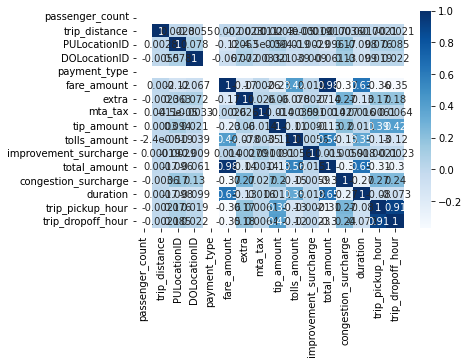

In [20]:
sns.heatmap(df_correlation,annot=True,cmap='Blues') # annot=True give correlation coeff. value


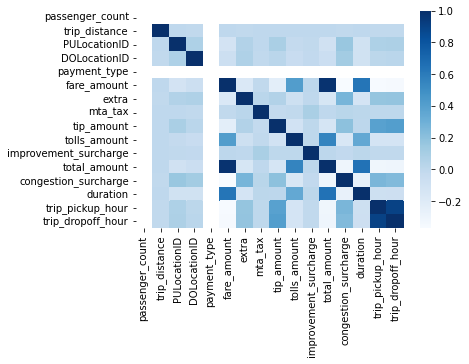

In [21]:
sns.heatmap(df_correlation,cmap='Blues')

From the above result we can observe that value for passenger count & payment type is empty for same row

Now we will replace these number in payment category with actual category names.

In [ ]:
trip_data.describe()

passenger_count  trip_distance   PULocationID   DOLocationID  \
count    499043.000000  549760.000000  549760.000000  549760.000000   
mean          1.356148       4.104275     157.636474     153.473989   
std           1.016665     336.024280      69.756787      73.842217   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.010000     107.000000      87.000000   
50%           1.000000       1.860000     151.000000     151.000000   
75%           1.000000       3.660000     234.000000     233.000000   
max           9.000000  220386.230000     265.000000     265.000000   

        payment_type    fare_amount          extra        mta_tax  \
count  499043.000000  549760.000000  549760.000000  549760.000000   
mean        1.373327      13.606734       1.023772       0.491298   
std         0.531616      13.521364       1.263818       0.080832   
min         1.000000    -216.000000      -4.500000      -0.500000   
25%         1.000000       6.000000       0.000000       0.500000   
50%         1.000000       9.000000       0.500000       0.500000   
75%         2.000000      15.500000       2.500000       0.500000   
max         5.000000     941.500000      87.560000       3.300000   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  \
count  549760.000000  549760.000000          549760.000000  549760.000000   
mean        1.762904       0.367066               0.296980      18.768912   
std         2.631495       1.751982               0.041437      15.178965   
min       -36.300000     -28.750000              -0.300000    -216.300000   
25%         0.000000       0.000000               0.300000      10.700000   
50%         1.500000       0.000000               0.300000      14.160000   
75%         2.750000       0.000000               0.300000      20.800000   
max       422.680000     114.750000               0.300000    1141.100000   

       congestion_surcharge       duration  trip_pickup_hour  \
count         549760.000000  549760.000000     549760.000000   
mean               1.967681      13.432875         13.240316   
std                1.044792     718.504127          5.146932   
min               -2.500000 -531231.233333          0.000000   
25%                2.500000       5.566667         10.000000   
50%                2.500000       9.416667         14.000000   
75%                2.500000      15.866667         17.000000   
max                2.500000    4497.566667         23.000000   

       trip_dropoff_hour  
count      549760.000000  
mean           13.333878  
std             5.181676  
min             0.000000  
25%            10.000000  
50%            14.000000  
75%            17.000000  
max            23.000000

In [15]:
trip_data_cleaned = trip_data.loc[trip_data.payment_type.notnull() | trip_data.passenger_count.notnull()]

In [16]:
# function for mapping numerical payment_type to actual payment
def map_payment_type(x):
    if x==1:
        return 'Credit_card'
    elif x==2:
        return 'Cash'
    elif x==3:
        return 'No_charge'
    elif x==4:
        return 'Dispute'
    elif x==5:
        return 'Unknown'
    else:
        return 'Voided_trip'

# use .apply and lambda on payment_type column to change 'payment_type' column
trip_data_cleaned['payment_type'] = trip_data_cleaned.payment_type.apply(lambda x:map_payment_type(x))
# print data head
trip_data_cleaned.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-06-01 00:31:23   2020-06-01 00:49:58              1.0            3.6   
1  2020-06-01 00:42:50   2020-06-01 01:04:33              1.0            5.6   
2  2020-06-01 00:39:51   2020-06-01 00:49:09              1.0            2.3   
3  2020-06-01 00:56:13   2020-06-01 01:11:38              1.0            5.3   
4  2020-06-01 00:16:41   2020-06-01 00:29:30              1.0            4.4   

   PULocationID  DOLocationID payment_type  fare_amount  extra  mta_tax  \
0           140            68  Credit_card         15.5    3.0      0.5   
1            79           226  Credit_card         19.5    3.0      0.5   
2           238           116         Cash         10.0    0.5      0.5   
3           141           116         Cash         17.5    3.0      0.5   
4           186            75  Credit_card         14.5    3.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        4.00           0.0                    0.3         23.30   
1        2.00           0.0                    0.3         25.30   
2        0.00           0.0                    0.3         11.30   
3        0.00           0.0                    0.3         21.30   
4        3.65           0.0                    0.3         21.95   

   congestion_surcharge   duration  trip_pickup_hour  trip_dropoff_hour  \
0                   2.5  18.583333                 0                  0   
1                   2.5  21.716667                 0                  1   
2                   0.0   9.300000                 0                  0   
3                   2.5  15.416667                 0                  1   
4                   2.5  12.816667                 0                  0   

  trip_day  
0   Monday  
1   Monday  
2   Monday  
3   Monday  
4   Monday

In [17]:
# print data info to show that payment_type data type has changed
trip_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499043 entries, 0 to 499042
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   tpep_pickup_datetime   499043 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  499043 non-null  datetime64[ns]
 2   passenger_count        499043 non-null  float64       
 3   trip_distance          499043 non-null  float64       
 4   PULocationID           499043 non-null  int64         
 5   DOLocationID           499043 non-null  int64         
 6   payment_type           499043 non-null  object        
 7   fare_amount            499043 non-null  float64       
 8   extra                  499043 non-null  float64       
 9   mta_tax                499043 non-null  float64       
 10  tip_amount             499043 non-null  float64       
 11  tolls_amount           499043 non-null  float64       
 12  improvement_surcharge  499043 non-null  floa

Now our Total_amount is basically<br>
Total_amount = fare_amount + tolls_amount + tip_amount + (extra + mta_tax + improvement_surcharge)

of the above components of total_amount we will specifically focus on 'fare_amount','tip_amount', 'tolls_amount' and 'total taxes'.

We are combining the extra, mta_tax and improvement_surcharge under one category called total_taxes as these are determined by local laws and taxes and is not dependent upon distance travelled or time taken for trip.

Here total taxes would be the sum of three columns 'extra','mta_tax', 'improvement_surcharge'. So we will make a new column for total_taxes.

We will also drop these three columns 'extra','mta_tax','improvement_surcharge'.


In [18]:
# create 'total_taxes' column from summing 'extra','mta_tax', 'improvement_surcharge'
trip_data_cleaned['total_taxes'] = trip_data_cleaned['extra']+trip_data_cleaned['mta_tax']+trip_data_cleaned['improvement_surcharge']
# drop 'extra','mta_tax','improvement_surcharge' columns
trip_data_cleaned.drop(['extra','mta_tax','improvement_surcharge'],axis=1,inplace=True)
# print data head
trip_data_cleaned.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-06-01 00:31:23   2020-06-01 00:49:58              1.0            3.6   
1  2020-06-01 00:42:50   2020-06-01 01:04:33              1.0            5.6   
2  2020-06-01 00:39:51   2020-06-01 00:49:09              1.0            2.3   
3  2020-06-01 00:56:13   2020-06-01 01:11:38              1.0            5.3   
4  2020-06-01 00:16:41   2020-06-01 00:29:30              1.0            4.4   

   PULocationID  DOLocationID payment_type  fare_amount  tip_amount  \
0           140            68  Credit_card         15.5        4.00   
1            79           226  Credit_card         19.5        2.00   
2           238           116         Cash         10.0        0.00   
3           141           116         Cash         17.5        0.00   
4           186            75  Credit_card         14.5        3.65   

   tolls_amount  total_amount  congestion_surcharge   duration  \
0           0.0         23.30                   2.5  18.583333   
1           0.0         25.30                   2.5  21.716667   
2           0.0         11.30                   0.0   9.300000   
3           0.0         21.30                   2.5  15.416667   
4           0.0         21.95                   2.5  12.816667   

   trip_pickup_hour  trip_dropoff_hour trip_day  total_taxes  
0                 0                  0   Monday          3.8  
1                 0                  1   Monday          3.8  
2                 0                  0   Monday          1.3  
3                 0                  1   Monday          3.8  
4                 0                  0   Monday          3.8

In [19]:
trip_data.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-06-01 00:31:23   2020-06-01 00:49:58              1.0            3.6   
1  2020-06-01 00:42:50   2020-06-01 01:04:33              1.0            5.6   
2  2020-06-01 00:39:51   2020-06-01 00:49:09              1.0            2.3   
3  2020-06-01 00:56:13   2020-06-01 01:11:38              1.0            5.3   
4  2020-06-01 00:16:41   2020-06-01 00:29:30              1.0            4.4   

   PULocationID  DOLocationID payment_type  fare_amount  tip_amount  \
0           140            68  Credit_card         15.5        4.00   
1            79           226  Credit_card         19.5        2.00   
2           238           116         Cash         10.0        0.00   
3           141           116         Cash         17.5        0.00   
4           186            75  Credit_card         14.5        3.65   

   tolls_amount  total_amount  congestion_surcharge   duration  \
0           0.0         23.30                   2.5  18.583333   
1           0.0         25.30                   2.5  21.716667   
2           0.0         11.30                   0.0   9.300000   
3           0.0         21.30                   2.5  15.416667   
4           0.0         21.95                   2.5  12.816667   

   trip_pickup_hour  trip_dropoff_hour trip_day  total_taxes  
0                 0                  0   Monday          3.8  
1                 0                  1   Monday          3.8  
2                 0                  0   Monday          1.3  
3                 0                  1   Monday          3.8  
4                 0                  0   Monday          3.8

In [19]:
trip_data_cleaned.to_csv('/content/drive/MyDrive/Data Science by Onelearn/EDA/Taxi Data Analysis/yellow_taxi_june_cleaned.csv',index=False)

We will be reading back this file in data analysis and visualisation step.

# Data Analysis and Visualisation

Let's load back our cleaned dataset here.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
trip_data = pd.read_csv('/content/drive/MyDrive/Data Science by Onelearn/EDA/Taxi Data Analysis/yellow_taxi_june_cleaned.csv')
trip_data.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-06-01 00:31:23   2020-06-01 00:49:58              1.0            3.6   
1  2020-06-01 00:42:50   2020-06-01 01:04:33              1.0            5.6   
2  2020-06-01 00:39:51   2020-06-01 00:49:09              1.0            2.3   
3  2020-06-01 00:56:13   2020-06-01 01:11:38              1.0            5.3   
4  2020-06-01 00:16:41   2020-06-01 00:29:30              1.0            4.4   

   PULocationID  DOLocationID payment_type  fare_amount  tip_amount  \
0           140            68  Credit_card         15.5        4.00   
1            79           226  Credit_card         19.5        2.00   
2           238           116         Cash         10.0        0.00   
3           141           116         Cash         17.5        0.00   
4           186            75  Credit_card         14.5        3.65   

   tolls_amount  total_amount  congestion_surcharge   duration  \
0           0.0         23.30                   2.5  18.583333   
1           0.0         25.30                   2.5  21.716667   
2           0.0         11.30                   0.0   9.300000   
3           0.0         21.30                   2.5  15.416667   
4           0.0         21.95                   2.5  12.816667   

   trip_pickup_hour  trip_dropoff_hour trip_day  total_taxes  
0                 0                  0   Monday          3.8  
1                 0                  1   Monday          3.8  
2                 0                  0   Monday          1.3  
3                 0                  1   Monday          3.8  
4                 0                  0   Monday          3.8

Now this problem statement is very open ended as we are not given a clear idea exactly what kinds of analysis we should do.

We are just told about the data which we have to explore and analyse.

In such cases we could follow the below series of steps to standardise our exploration of the dataset.

- Start by writing the assumption and question that you want to solve (This is just a preliminary assumption and question writing and you need to be too much detailed here). The purpose of this is to identify the most important analysis that you should and not miss it out.
- Univariate analysis
    - Analyse each feature separately
    - Depending upon data type execute the analysis
     - numerical and visual
    - Data validation - check if the data is correct or not
    - You should try to identify trends and test your assumptions here 
    - while doing this analysis try to identify the analysis points helping in solving the question in first steps
- Bivariate analysis 
    - analyse combination of features (if possible analyse all combinations but definitely go for the feature combinations that makes most sense to analyse)
    - correlation and pair plotting
    - You should try to identify trends and test your assumptions here
    - while doing this analysis try to identify the analysis points helping in solving the question in first steps
- Custom Analysis - You would have some insights by this point of the analysis. Then you deep dive into these insights.
- Combine your results and present it

Except for custom analysis part we will be executing all the parts below.

## ASSUMPTIONS/ANALYSIS THAT MIGHT BE USEFUL FOR OUR COMPANY<br>

**IMPORTANT CHARACTERISTICS OF A TRIP**
* fare_amount, trip_distance, duration and passenger count distribution can tell us about the important characteristics about the trip.


**PRICING EXPLORATION**
* payment_type can tell us which kind of payment mode the customer usually favours.


* Another issue that taxi companies face is pricing the trip appropriately. So for exploring the pricing of trip, we can also look into the relationship between pricing related variables and hour/day of trip and pricing related variables and location.

**TIME/LOCATION EXPLORATION** 
* To maximize the earnings we should be focussing on trips which are on busy locations and busy times. 


**DURATION OF TRIP EXPLORATION**
* A typical taxi company faces a common problem of efficiently assigning the cabs to passengers so that the service is smooth and hassle free. One of main issue is determining the duration of the current trip. So, We should look into relationship between duration and location, duration and hour of trip.




## **Univariate Analysis**

The first step in doing any kind of EDA is identifying the distribution of important variables in EDA. This helps us in finding important insights about the data.<br>
We should look into the distribution of these specific columns:<br>
Price Based Columns
* fare_amount
* tip_amount
* total_taxes
* tolls_amount
* payment_type
* total_amount

Time Based Columns
* duration
* trip_pickup_hour
* trip_dropoff_hour
* trip_day

Distance/Location Based Columns
* trip_distance
* PULocationID
* DOLocationID

Other columns
* passenger_count

Before we explore the distribution of each column we must identify column category because distribution analysis depends upon variable category:<br>
* Continuous - column which are measurable and uncountable in nature - we use histograms and box plot
* Categorical - column which have categories as it data - we use bar charts

Following columns are continuous in nature:<br>
* fare_amount
* tip_amount
* total_taxes
* total_amount
* duration
* trip_distance
* tolls_amount

Following columns are categorical in nature:<br>
* payment_type
* trip_pickup_hour - it has 24 categories
* trip_dropoff_hour - it has 24 categories
* trip_day - it has 7 categories
* PULocationID
* DOLocationID
* Passenger_count

We will look into the distrbution of passenger_count at the last.

**CONTINUOUS VARIABLE DISTRIBUTION**

In [21]:
# continuous_columns list
continuous_columns = ['fare_amount','tip_amount','total_taxes','total_amount','duration','trip_distance','tolls_amount']

In [35]:
trip_data[continuous_columns].head()

fare_amount  tip_amount  total_taxes  total_amount   duration  \
0         15.5        4.00          3.8         23.30  18.583333   
1         19.5        2.00          3.8         25.30  21.716667   
2         10.0        0.00          1.3         11.30   9.300000   
3         17.5        0.00          3.8         21.30  15.416667   
4         14.5        3.65          3.8         21.95  12.816667   

   trip_distance  tolls_amount  
0            3.6           0.0  
1            5.6           0.0  
2            2.3           0.0  
3            5.3           0.0  
4            4.4           0.0

In [36]:
# use .describe() for showing the statistics for continuous columns
trip_data[continuous_columns].describe()

fare_amount     tip_amount    total_taxes   total_amount  \
count  499043.000000  499043.000000  499043.000000  499043.000000   
mean       11.844105       1.772877       1.913003      17.027168   
std        11.449169       2.696115       1.298949      13.431950   
min      -216.000000     -36.300000      -5.300000    -216.300000   
25%         6.000000       0.000000       0.800000      10.300000   
50%         8.500000       1.500000       1.300000      13.560000   
75%        13.500000       2.650000       3.300000      18.950000   
max       941.500000     422.680000      88.360000    1141.100000   

            duration  trip_distance   tolls_amount  
count  499043.000000  499043.000000  499043.000000  
mean       12.515558       2.864602       0.221110  
std       754.114013      32.119857       1.368441  
min   -531231.233333       0.000000     -28.750000  
25%         5.300000       1.000000       0.000000  
50%         8.816667       1.710000       0.000000  
75%        14.316667       3.140000       0.000000  
max      4497.566667   22543.990000     114.750000

Since we are trying to understand the distribution of continuous numerical variables, we will be using 
* histograms
* box plots

Below we have used a for loop to loop through all the continuous variables and then draw histograms and box plots for each of them at each iteration.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


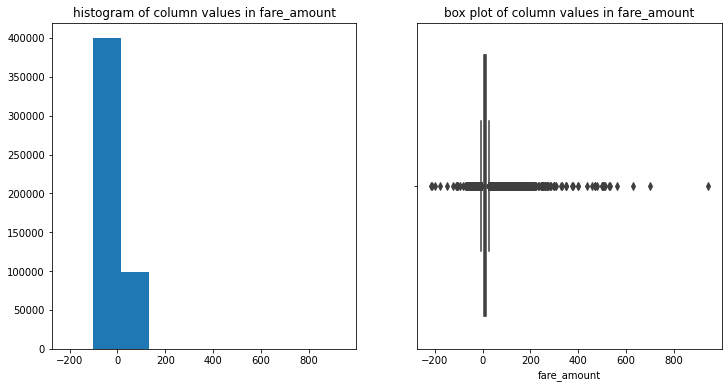

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


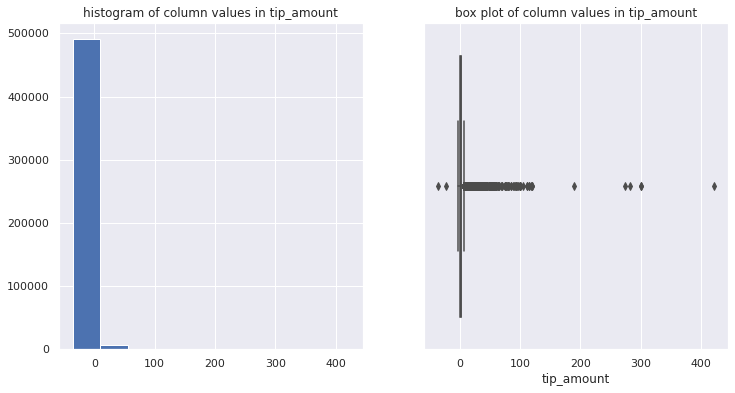

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


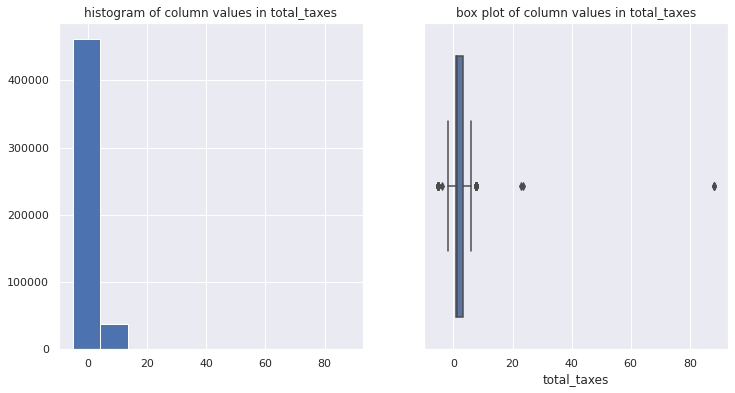

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


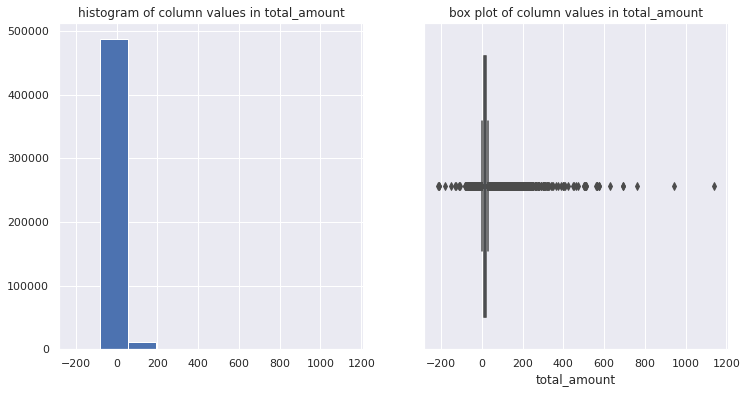

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


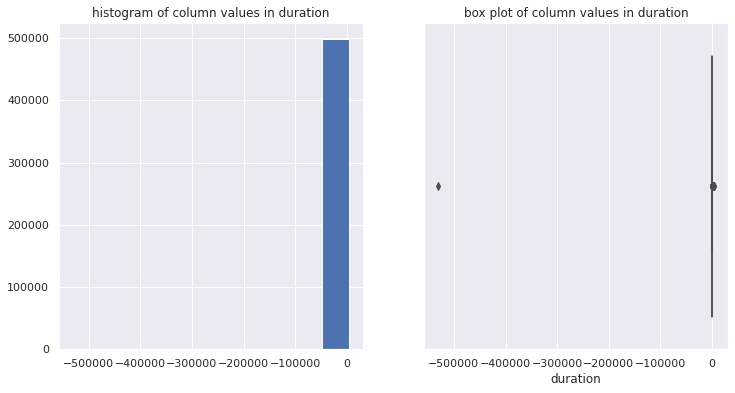

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


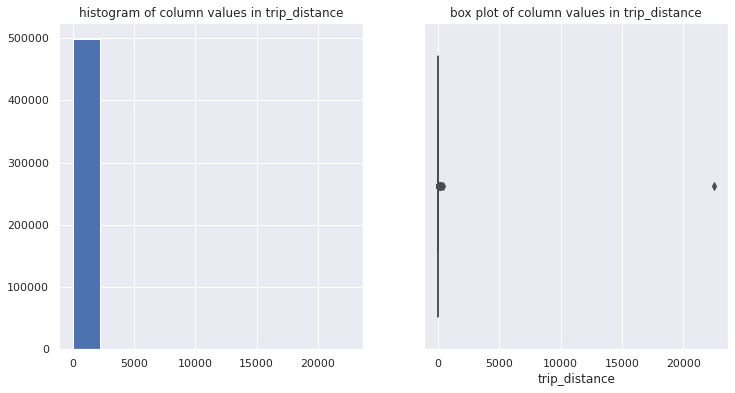

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


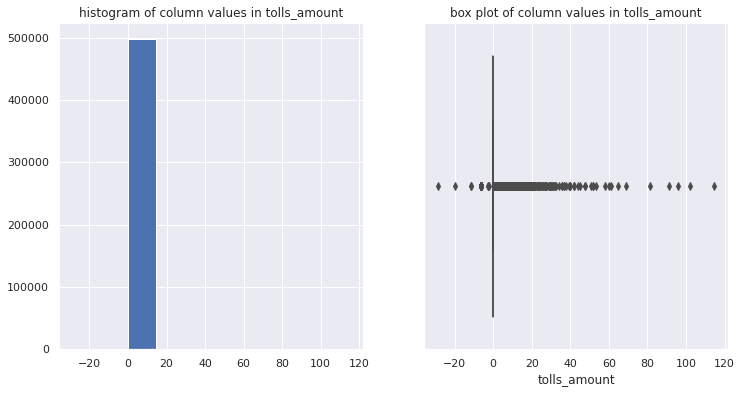

In [37]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(trip_data[feature])
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(trip_data[feature],ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

Negtive values for columns does not make sense<br>
fare_amount<br>
tip_amount<br>
total_taxes<br>
tolls_amount<br>
total_amount<br>
duration<br>

Let's just observe how the negative values in each of these columns look like

In [38]:
# using .loc to show negative values in fare_amount  # 8 mil rows
trip_data.loc[trip_data['fare_amount']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
14      2020-06-01 00:21:28   2020-06-01 00:25:01              1.0   
103     2020-06-01 00:41:37   2020-06-01 00:41:54              1.0   
157     2020-06-01 01:56:10   2020-06-01 02:12:36              1.0   
167     2020-06-01 01:46:11   2020-06-01 02:06:21              1.0   
169     2020-06-01 01:48:54   2020-06-01 01:49:08              1.0   
...                     ...                   ...              ...   
496548  2020-06-30 19:55:21   2020-06-30 20:02:14              2.0   
497180  2020-06-30 20:04:44   2020-06-30 20:04:46              2.0   
497538  2020-06-30 21:11:21   2020-06-30 21:12:12              1.0   
497984  2020-06-30 21:56:04   2020-06-30 21:56:23              2.0   
498129  2020-06-30 22:53:42   2020-06-30 23:14:21              1.0   

        trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
14               1.11           100           249      Dispute         -5.5   
103              0.00           186           186    No_charge         -2.0   
157              1.61           260             7      Dispute        -12.5   
167              2.62            95           160      Dispute        -13.5   
169              0.04           246           246    No_charge         -2.5   
...               ...           ...           ...          ...          ...   
496548           1.70           100           170      Dispute         -6.5   
497180           0.00           262           264    No_charge         -2.5   
497538           0.03            41            41      Dispute         -2.5   
497984           0.06           164           186      Dispute         -2.5   
498129           5.18           186            41      Dispute        -18.5   

        tip_amount  tolls_amount  total_amount  congestion_surcharge  \
14             0.0           0.0          -9.3                  -2.5   
103            0.0           0.0          -4.8                  -2.5   
157            0.0           0.0         -13.8                   0.0   
167            0.0           0.0         -14.8                   0.0   
169            0.0           0.0          -6.3                  -2.5   
...            ...           ...           ...                   ...   
496548         0.0           0.0         -10.8                  -2.5   
497180         0.0           0.0          -3.8                   0.0   
497538         0.0           0.0          -3.8                   0.0   
497984         0.0           0.0          -6.3                  -2.5   
498129         0.0           0.0         -22.3                  -2.5   

         duration  trip_pickup_hour  trip_dropoff_hour trip_day  total_taxes  
14       3.550000                 0                  0   Monday         -1.3  
103      0.283333                 0                  0   Monday         -0.3  
157     16.433333                 1                  2   Monday         -1.3  
167     20.166667                 1                  2   Monday         -1.3  
169      0.233333                 1                  1   Monday         -1.3  
...           ...               ...                ...      ...          ...  
496548   6.883333                19                 20  Tuesday         -1.8  
497180   0.033333                20                 20  Tuesday         -1.3  
497538   0.850000                21                 21  Tuesday         -1.3  
497984   0.316667                21                 21  Tuesday         -1.3  
498129  20.650000                22                 23  Tuesday         -1.3  

[2507 rows x 17 columns]

In [39]:
# using .loc to show negative values in tip_amount
trip_data.loc[trip_data['tip_amount']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4969    2020-06-01 12:34:24   2020-06-01 12:34:46              1.0   
29627   2020-06-03 10:19:57   2020-06-03 10:20:14              1.0   
31382   2020-06-03 12:34:51   2020-06-03 12:35:16              1.0   
69396   2020-06-06 09:22:35   2020-06-06 09:22:41              1.0   
250773  2020-06-18 12:49:41   2020-06-18 12:51:54              1.0   
261559  2020-06-18 21:07:58   2020-06-18 21:28:00              1.0   
266834  2020-06-19 10:02:36   2020-06-19 10:25:54              1.0   
267144  2020-06-19 10:49:38   2020-06-19 10:49:45              2.0   
287624  2020-06-20 12:00:05   2020-06-20 12:00:17              1.0   
289503  2020-06-20 14:55:08   2020-06-20 14:55:43              1.0   
290402  2020-06-20 15:07:45   2020-06-20 15:07:49              1.0   
313319  2020-06-22 10:14:56   2020-06-22 10:15:13              1.0   
314904  2020-06-22 11:44:30   2020-06-22 11:49:22              1.0   
315557  2020-06-22 12:05:12   2020-06-22 12:05:42              1.0   
321723  2020-06-22 16:21:07   2020-06-22 16:22:50              1.0   
336764  2020-06-23 11:54:49   2020-06-23 11:55:43              1.0   
362657  2020-06-24 13:32:35   2020-06-24 13:34:15              1.0   
391225  2020-06-25 16:09:26   2020-06-25 16:09:36              1.0   
399294  2020-06-26 04:52:06   2020-06-26 04:54:23              1.0   
407796  2020-06-26 13:12:39   2020-06-26 13:13:07              1.0   
428771  2020-06-27 13:37:18   2020-06-27 13:39:04              6.0   
457187  2020-06-29 09:07:01   2020-06-29 09:07:49              1.0   
458868  2020-06-29 10:10:40   2020-06-29 10:10:51              1.0   
459487  2020-06-29 11:08:44   2020-06-29 11:09:14              1.0   
462158  2020-06-29 13:40:02   2020-06-29 13:40:32              1.0   
466046  2020-06-29 15:28:52   2020-06-29 15:29:08              1.0   
466253  2020-06-29 15:01:23   2020-06-29 15:01:37              1.0   
466434  2020-06-29 15:06:59   2020-06-29 15:07:56              3.0   
482056  2020-06-30 11:10:29   2020-06-30 11:11:01              1.0   
485545  2020-06-30 13:34:39   2020-06-30 13:36:12              1.0   
486607  2020-06-30 13:39:31   2020-06-30 13:40:33              1.0   
493316  2020-06-30 17:11:26   2020-06-30 17:13:39              1.0   

        trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
4969             0.00           193           193      Dispute         -2.5   
29627            0.00           193           193    No_charge         -2.5   
31382            0.00           193           193      Dispute         -2.5   
69396            0.00           193           193    No_charge         -2.5   
250773           0.00             7             7    No_charge         -3.5   
261559           4.07           239           137      Dispute        -17.0   
266834          10.59           231           223  Credit_card        -31.0   
267144           0.00           193           264    No_charge         -2.5   
287624           0.00           193           193    No_charge         -2.5   
289503           0.00           193           193    No_charge         -2.5   
290402           0.00           193           193      Dispute         -2.5   
313319           0.00           193           193    No_charge         -2.5   
314904           0.00           193           193    No_charge         -4.5   
315557           0.00           193           193    No_charge         -2.5   
321723           0.00           193           193    No_charge         -3.0   
336764           0.00           193           193    No_charge         -2.5   
362657           0.00           193           193    No_charge         -3.0   
391225           0.00           152           264    No_charge         -2.5   
399294           0.00           152           152    No_charge         -3.5   
407796           0.00           193           193    No_charge         -2.5   
428771           0.00           193  

In [40]:
# using .loc to show negative values in tolls_amount
trip_data.loc[trip_data['tolls_amount']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
26633   2020-06-03 01:01:05   2020-06-03 01:21:12              1.0   
50519   2020-06-04 17:45:16   2020-06-04 17:57:23              1.0   
57050   2020-06-05 10:53:22   2020-06-05 11:18:36              1.0   
58141   2020-06-05 11:17:46   2020-06-05 11:46:03              1.0   
61204   2020-06-05 14:34:36   2020-06-05 14:49:27              1.0   
67111   2020-06-05 20:12:07   2020-06-05 20:44:02              1.0   
76709   2020-06-06 19:34:15   2020-06-06 20:07:45              1.0   
92472   2020-06-08 11:28:59   2020-06-08 11:57:17              1.0   
114259  2020-06-09 16:01:43   2020-06-09 16:33:58              1.0   
118429  2020-06-09 22:14:44   2020-06-09 22:51:44              4.0   
131441  2020-06-10 17:42:44   2020-06-10 18:43:40              1.0   
161976  2020-06-12 15:32:10   2020-06-12 16:07:18              1.0   
165386  2020-06-12 18:49:03   2020-06-12 19:10:08              1.0   
171664  2020-06-13 10:45:53   2020-06-13 11:11:32              1.0   
172248  2020-06-13 11:28:27   2020-06-13 11:45:30              1.0   
176013  2020-06-13 15:34:09   2020-06-13 15:56:52              1.0   
188454  2020-06-14 17:08:15   2020-06-14 17:29:17              1.0   
207005  2020-06-15 20:52:40   2020-06-15 21:22:12              1.0   
243752  2020-06-17 23:37:16   2020-06-18 00:01:42              1.0   
250870  2020-06-18 12:23:19   2020-06-18 12:56:31              1.0   
262233  2020-06-18 23:04:33   2020-06-18 23:22:36              1.0   
268440  2020-06-19 11:19:23   2020-06-19 11:42:33              1.0   
269373  2020-06-19 12:45:41   2020-06-19 13:03:37              1.0   
269924  2020-06-19 12:02:01   2020-06-19 12:21:11              1.0   
281528  2020-06-19 21:25:39   2020-06-19 22:16:00              1.0   
283488  2020-06-20 03:36:57   2020-06-20 04:05:24              1.0   
296993  2020-06-21 05:21:47   2020-06-21 05:23:01              3.0   
328119  2020-06-22 21:12:44   2020-06-22 21:14:06              2.0   
360732  2020-06-24 12:33:40   2020-06-24 12:58:41              1.0   
370204  2020-06-24 18:15:52   2020-06-24 18:46:24              1.0   
374693  2020-06-24 23:43:28   2020-06-25 00:06:42              1.0   
374872  2020-06-24 23:54:34   2020-06-25 00:22:27              1.0   
387705  2020-06-25 14:48:34   2020-06-25 15:20:08              1.0   
394436  2020-06-25 18:28:52   2020-06-25 18:54:58              1.0   
403855  2020-06-26 10:28:29   2020-06-26 11:02:31              1.0   
414625  2020-06-26 16:01:48   2020-06-26 16:02:02              1.0   
415541  2020-06-26 17:48:53   2020-06-26 18:24:05              1.0   
420385  2020-06-26 20:38:54   2020-06-26 21:00:25              1.0   
420772  2020-06-26 21:13:29   2020-06-26 21:56:32              1.0   
423198  2020-06-27 00:06:15   2020-06-27 00:32:42              1.0   
423606  2020-06-27 02:28:26   2020-06-27 02:51:44              1.0   
433187  2020-06-27 16:08:46   2020-06-27 16:34:20              1.0   
451251  2020-06-28 20:50:03   2020-06-28 21:25:18              1.0   
455003  2020-06-29 07:21:02   2020-06-29 07:41:32              1.0   
455692  2020-06-29 08:56:08   2020-06-29 09:30:05              1.0   
459666  2020-06-29 11:44:03   2020-06-29 12:06:25              1.0   
469706  2020-06-29 17:16:03   2020-06-29 17:49:41              1.0   
491947  2020-06-30 16:47:59   2020-06-30 17:49:24              1.0   
493482  2020-06-30 17:13:59   2020-06-30 17:48:49              1.0   
495404  2020-06-30 18:30:28   2020-06-30 18:59:19              1.0   

        trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
26633            9.78           170           197      Dispute        -28.5   
50519            3.02           170           112         Cash        -11.5   
57050           11.55           230           121      Dispute        -35.0   
58141           19.58            48             1         Cash        -53.0   
61204            9.82           138      

In [41]:
# using .loc to show negative values in total_taxes
trip_data.loc[trip_data['total_taxes']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
14      2020-06-01 00:21:28   2020-06-01 00:25:01              1.0   
103     2020-06-01 00:41:37   2020-06-01 00:41:54              1.0   
157     2020-06-01 01:56:10   2020-06-01 02:12:36              1.0   
167     2020-06-01 01:46:11   2020-06-01 02:06:21              1.0   
169     2020-06-01 01:48:54   2020-06-01 01:49:08              1.0   
...                     ...                   ...              ...   
496548  2020-06-30 19:55:21   2020-06-30 20:02:14              2.0   
497180  2020-06-30 20:04:44   2020-06-30 20:04:46              2.0   
497538  2020-06-30 21:11:21   2020-06-30 21:12:12              1.0   
497984  2020-06-30 21:56:04   2020-06-30 21:56:23              2.0   
498129  2020-06-30 22:53:42   2020-06-30 23:14:21              1.0   

        trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
14               1.11           100           249      Dispute         -5.5   
103              0.00           186           186    No_charge         -2.0   
157              1.61           260             7      Dispute        -12.5   
167              2.62            95           160      Dispute        -13.5   
169              0.04           246           246    No_charge         -2.5   
...               ...           ...           ...          ...          ...   
496548           1.70           100           170      Dispute         -6.5   
497180           0.00           262           264    No_charge         -2.5   
497538           0.03            41            41      Dispute         -2.5   
497984           0.06           164           186      Dispute         -2.5   
498129           5.18           186            41      Dispute        -18.5   

        tip_amount  tolls_amount  total_amount  congestion_surcharge  \
14             0.0           0.0          -9.3                  -2.5   
103            0.0           0.0          -4.8                  -2.5   
157            0.0           0.0         -13.8                   0.0   
167            0.0           0.0         -14.8                   0.0   
169            0.0           0.0          -6.3                  -2.5   
...            ...           ...           ...                   ...   
496548         0.0           0.0         -10.8                  -2.5   
497180         0.0           0.0          -3.8                   0.0   
497538         0.0           0.0          -3.8                   0.0   
497984         0.0           0.0          -6.3                  -2.5   
498129         0.0           0.0         -22.3                  -2.5   

         duration  trip_pickup_hour  trip_dropoff_hour trip_day  total_taxes  
14       3.550000                 0                  0   Monday         -1.3  
103      0.283333                 0                  0   Monday         -0.3  
157     16.433333                 1                  2   Monday         -1.3  
167     20.166667                 1                  2   Monday         -1.3  
169      0.233333                 1                  1   Monday         -1.3  
...           ...               ...                ...      ...          ...  
496548   6.883333                19                 20  Tuesday         -1.8  
497180   0.033333                20                 20  Tuesday         -1.3  
497538   0.850000                21                 21  Tuesday         -1.3  
497984   0.316667                21                 21  Tuesday         -1.3  
498129  20.650000                22                 23  Tuesday         -1.3  

[2505 rows x 17 columns]

In [42]:
# using .loc to show negative values in total_amount
trip_data.loc[trip_data['total_amount']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
14      2020-06-01 00:21:28   2020-06-01 00:25:01              1.0   
103     2020-06-01 00:41:37   2020-06-01 00:41:54              1.0   
157     2020-06-01 01:56:10   2020-06-01 02:12:36              1.0   
167     2020-06-01 01:46:11   2020-06-01 02:06:21              1.0   
169     2020-06-01 01:48:54   2020-06-01 01:49:08              1.0   
...                     ...                   ...              ...   
496548  2020-06-30 19:55:21   2020-06-30 20:02:14              2.0   
497180  2020-06-30 20:04:44   2020-06-30 20:04:46              2.0   
497538  2020-06-30 21:11:21   2020-06-30 21:12:12              1.0   
497984  2020-06-30 21:56:04   2020-06-30 21:56:23              2.0   
498129  2020-06-30 22:53:42   2020-06-30 23:14:21              1.0   

        trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
14               1.11           100           249      Dispute         -5.5   
103              0.00           186           186    No_charge         -2.0   
157              1.61           260             7      Dispute        -12.5   
167              2.62            95           160      Dispute        -13.5   
169              0.04           246           246    No_charge         -2.5   
...               ...           ...           ...          ...          ...   
496548           1.70           100           170      Dispute         -6.5   
497180           0.00           262           264    No_charge         -2.5   
497538           0.03            41            41      Dispute         -2.5   
497984           0.06           164           186      Dispute         -2.5   
498129           5.18           186            41      Dispute        -18.5   

        tip_amount  tolls_amount  total_amount  congestion_surcharge  \
14             0.0           0.0          -9.3                  -2.5   
103            0.0           0.0          -4.8                  -2.5   
157            0.0           0.0         -13.8                   0.0   
167            0.0           0.0         -14.8                   0.0   
169            0.0           0.0          -6.3                  -2.5   
...            ...           ...           ...                   ...   
496548         0.0           0.0         -10.8                  -2.5   
497180         0.0           0.0          -3.8                   0.0   
497538         0.0           0.0          -3.8                   0.0   
497984         0.0           0.0          -6.3                  -2.5   
498129         0.0           0.0         -22.3                  -2.5   

         duration  trip_pickup_hour  trip_dropoff_hour trip_day  total_taxes  
14       3.550000                 0                  0   Monday         -1.3  
103      0.283333                 0                  0   Monday         -0.3  
157     16.433333                 1                  2   Monday         -1.3  
167     20.166667                 1                  2   Monday         -1.3  
169      0.233333                 1                  1   Monday         -1.3  
...           ...               ...                ...      ...          ...  
496548   6.883333                19                 20  Tuesday         -1.8  
497180   0.033333                20                 20  Tuesday         -1.3  
497538   0.850000                21                 21  Tuesday         -1.3  
497984   0.316667                21                 21  Tuesday         -1.3  
498129  20.650000                22                 23  Tuesday         -1.3  

[2506 rows x 17 columns]

Can i replace negative values of fare_amount with 0?

Ans. Not here. Because it will not give us a good measure of averages or other statistical measures. 

From the above table displays it is clear whenever fare_amount is negative, we have negative values in 'tip_amount','total_taxes' and 'total_amount'. You can check this by looking at the indexes of few of the rows.


Negative values for these cases does not make sense for doing our analysis. The reason for these negative values can be explored later on if we want to understand the data more better. For now we will remove these rows. 

Also, number of negative rows are 4260 which is 0.04% of total 8759874 observations. So even if we remove them it does not hamper the quantity of data that we have.

In [43]:
# data shape before filtering negative fare_amount rows
print(trip_data.shape)
# using .loc to filter only those rows where fare_amount is positive 
trip_data = trip_data.loc[trip_data['fare_amount']>=0]
# print data shape
print(trip_data.shape)
# print data.head()
trip_data.head()

(499043, 17)
(496536, 17)


tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-06-01 00:31:23   2020-06-01 00:49:58              1.0            3.6   
1  2020-06-01 00:42:50   2020-06-01 01:04:33              1.0            5.6   
2  2020-06-01 00:39:51   2020-06-01 00:49:09              1.0            2.3   
3  2020-06-01 00:56:13   2020-06-01 01:11:38              1.0            5.3   
4  2020-06-01 00:16:41   2020-06-01 00:29:30              1.0            4.4   

   PULocationID  DOLocationID payment_type  fare_amount  tip_amount  \
0           140            68  Credit_card         15.5        4.00   
1            79           226  Credit_card         19.5        2.00   
2           238           116         Cash         10.0        0.00   
3           141           116         Cash         17.5        0.00   
4           186            75  Credit_card         14.5        3.65   

   tolls_amount  total_amount  congestion_surcharge   duration  \
0           0.0         23.30                   2.5  18.583333   
1           0.0         25.30                   2.5  21.716667   
2           0.0         11.30                   0.0   9.300000   
3           0.0         21.30                   2.5  15.416667   
4           0.0         21.95                   2.5  12.816667   

   trip_pickup_hour  trip_dropoff_hour trip_day  total_taxes  
0                 0                  0   Monday          3.8  
1                 0                  1   Monday          3.8  
2                 0                  0   Monday          1.3  
3                 0                  1   Monday          3.8  
4                 0                  0   Monday          3.8

Let's check if removing rows with negative fare amount has also removed rows with negative tip_amount, total_taxes etc.

In [44]:
print(trip_data.loc[trip_data['tip_amount']<0].shape)
print(trip_data.loc[trip_data['total_taxes']<0].shape)
print(trip_data.loc[trip_data['tolls_amount']<0].shape)

(0, 17)
(0, 17)
(0, 17)


We will look into the negative values for duration

In [45]:
# using .loc to show negative values in duration
trip_data.loc[trip_data['duration']<0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
182427  2020-06-14 04:09:09   2019-06-11 06:17:55              1.0   

        trip_distance  PULocationID  DOLocationID payment_type  fare_amount  \
182427            8.1           262           138  Credit_card         26.0   

        tip_amount  tolls_amount  total_amount  congestion_surcharge  \
182427        7.18          6.12          43.1                   2.5   

             duration  trip_pickup_hour  trip_dropoff_hour trip_day  \
182427 -531231.233333                 4                  6   Sunday   

        total_taxes  
182427          3.8

Since there are only two rows with negative duration, we will remove them so as to do our analysis in a better way

In [46]:
# using .loc to filter only those rows where duration is positive 
trip_data = trip_data.loc[trip_data['duration']>=0]
print(trip_data.shape)

(496535, 17)


Now we will again look at the distribution plots for these variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


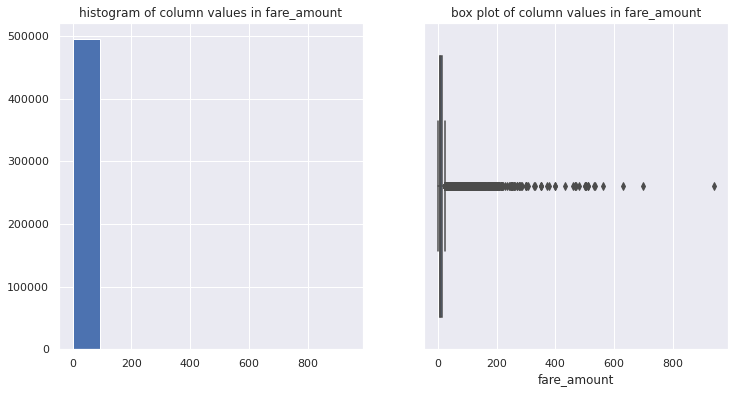

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


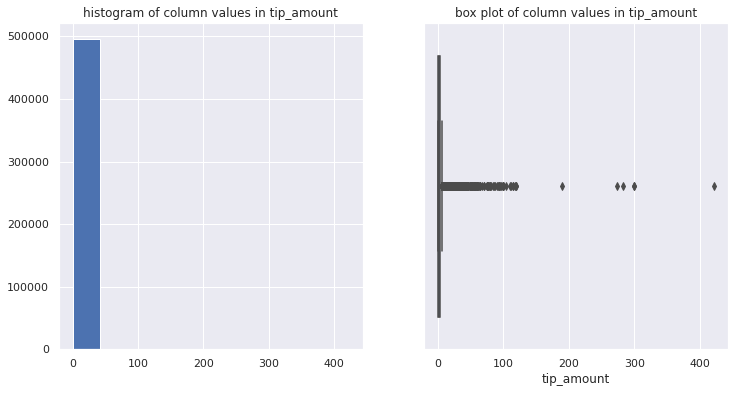

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


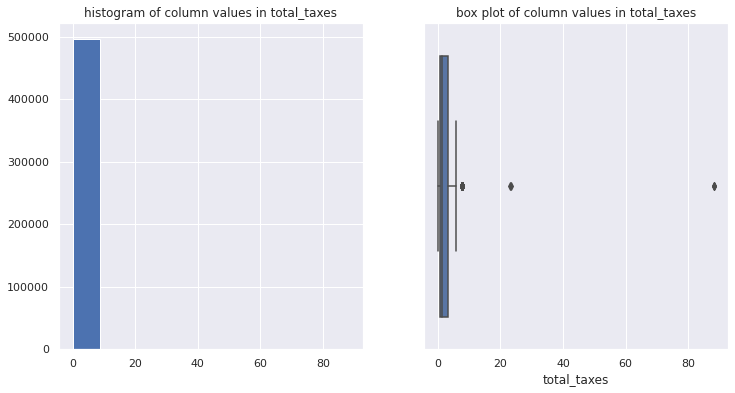

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


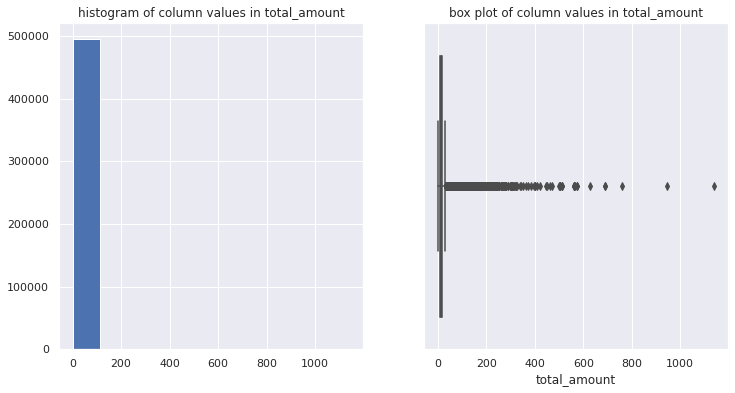

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


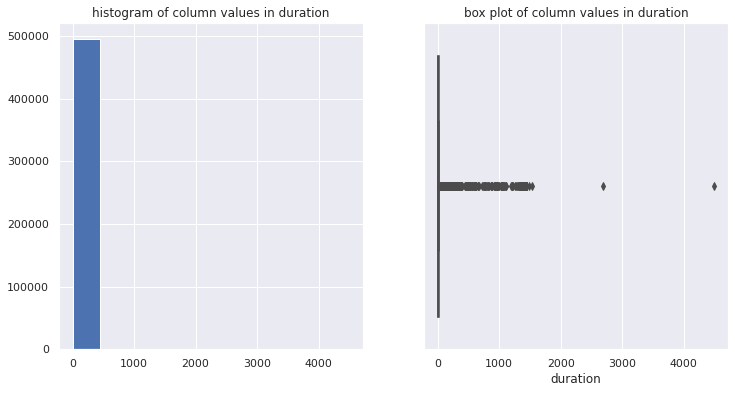

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


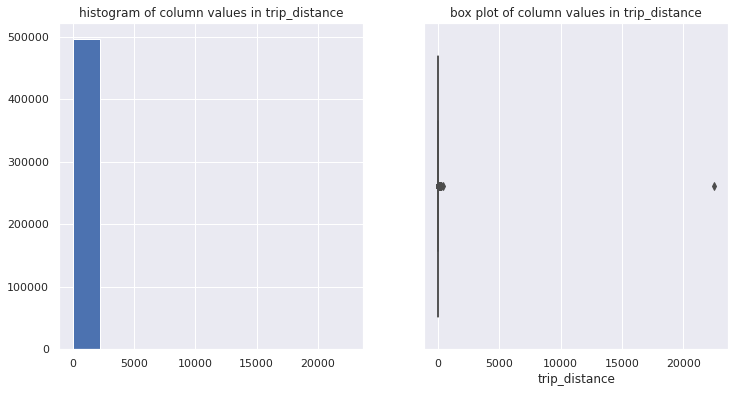

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


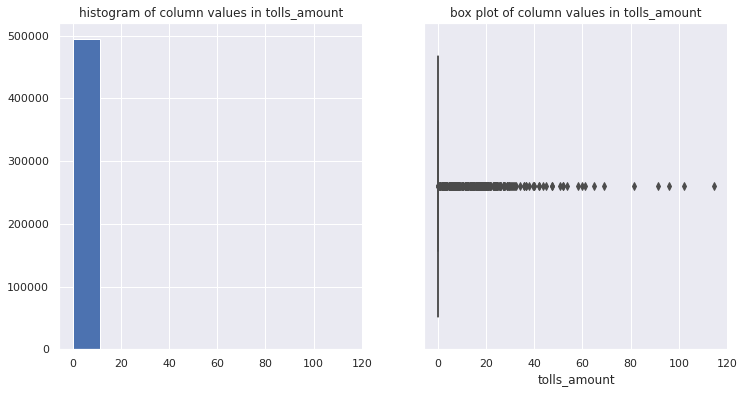

In [47]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(trip_data[feature])
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(trip_data[feature],ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

In [48]:
# use .describe() again to show the statistics for these continuous variables
trip_data[continuous_columns].describe()

fare_amount     tip_amount    total_taxes   total_amount  \
count  496535.000000  496535.000000  496535.000000  496535.000000   
mean       11.961693       1.781728       1.928338      17.186965   
std        11.302765       2.698590       1.283539      13.226779   
min         0.000000       0.000000       0.000000       0.000000   
25%         6.000000       0.000000       0.800000      10.350000   
50%         8.500000       1.500000       1.300000      13.560000   
75%        13.500000       2.660000       3.300000      18.960000   
max       941.500000     422.680000      88.360000    1141.100000   

            duration  trip_distance   tolls_amount  
count  496535.000000  496535.000000  496535.000000  
mean       13.609652       2.869083       0.222906  
std        56.380299      32.199957       1.369366  
min         0.000000       0.000000       0.000000  
25%         5.316667       1.000000       0.000000  
50%         8.833333       1.710000       0.000000  
75%        14.333333       3.150000       0.000000  
max      4497.566667   22543.990000     114.750000

we need to improve the look of histograms and box plots further as we are not able to clearly observe the distribution.

We will filter all the data for each feature with values less than 90% ile. Then plot that data as shown below

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


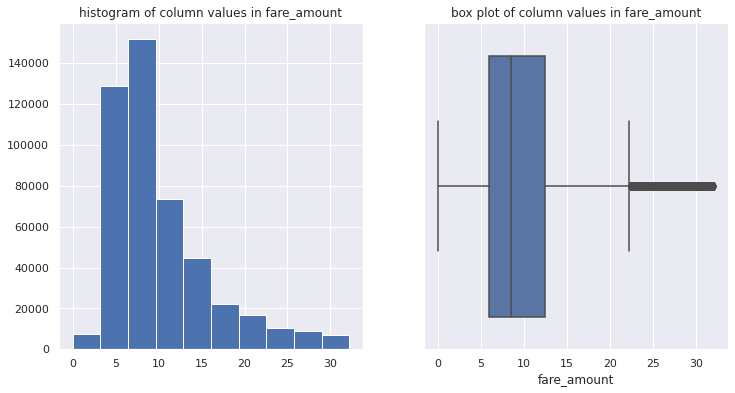

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


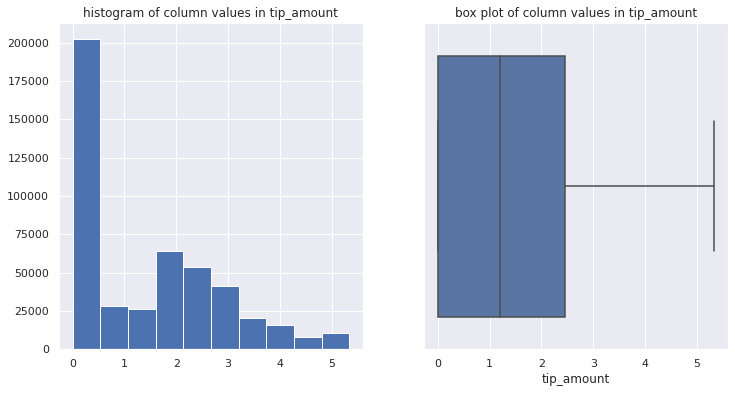

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


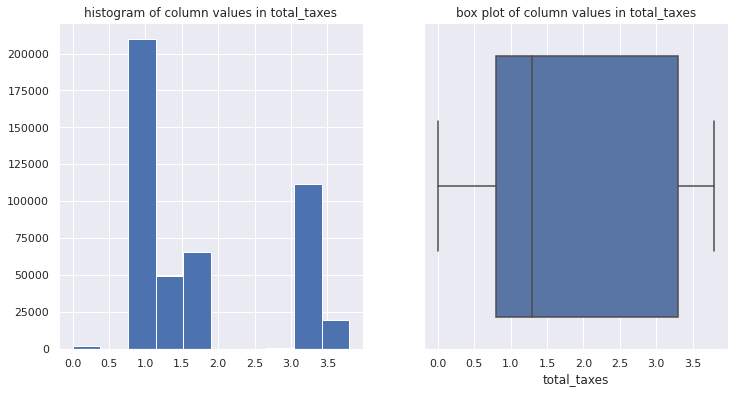

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


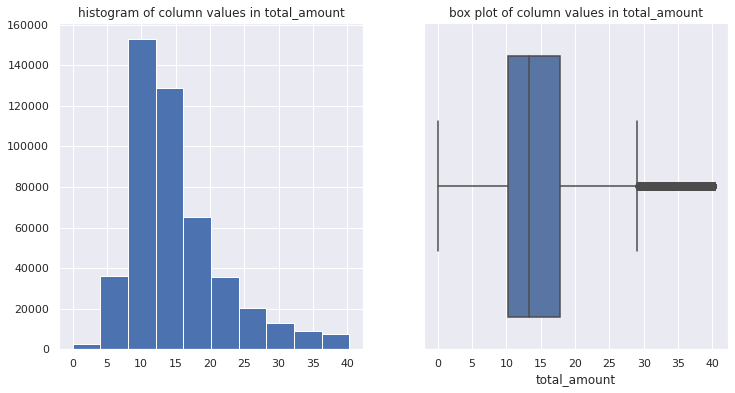

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


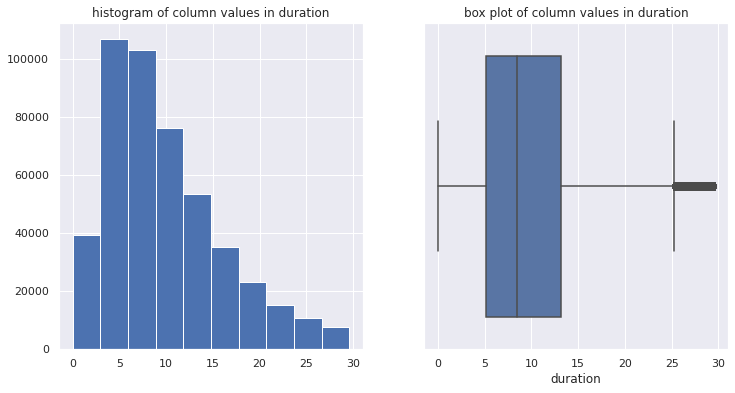

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


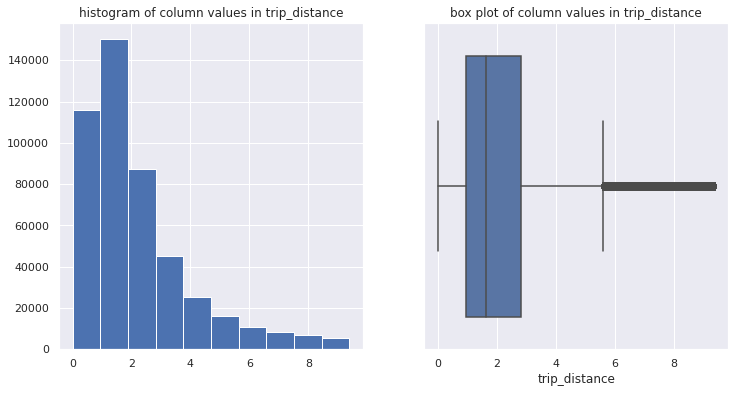

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


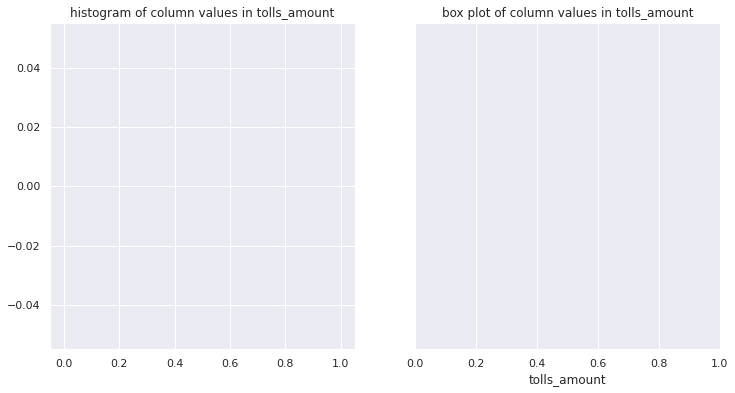

In [49]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    # removing the outliers
    feature_data_percentile = trip_data[feature].quantile(0.95)
    feature_data = trip_data.loc[trip_data[feature]<feature_data_percentile,feature]
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(feature_data)
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(feature_data,ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

Looking from the above histograms and box plots we can decipher following information for each column <br>
* fare_amount  - most of the fare amount is within 8-9 dollar value as is shown by the median value 8.5 dollar. Though there are some significant outliers, the maximum of which is 941 dollars.


* tip_amount - most of the tip amount is within 1-2 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 422 dollars. 


* tolls_amount - most of the tolls_amount value is 0 so it seems most of the trips do not have to pay for tolls.


* total_taxes - most of the total_taxes values is within 1.3 dollars as is shown by the median value. Though we have outliers in this case but it is not as signiificant as the case for tip and fare. max value is 88


* total_amount - most of the total_amount values is within 13-14 dollars as is shown by the median value. Again the outliers in this case seems mostly because of outliers in fare_amount.


* duration - most of the values in duration is within 8.5 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 4497 minutes.


* trip_distance - most of the trip_distance is within 1.71 miles value as is shown by the median. The outlier in this case is very large value 22543

**CATEGORICAL VARIABLE DISTRIBUTION**<br>
Let's move on to analyse the distribution of categorical variables

for analysing distribution of categorical variables we use bar plots showing the count% of each category.

In [50]:
# list of categorical_variables
categorical_variables = ['payment_type','trip_pickup_hour','trip_dropoff_hour','trip_day','PULocationID','DOLocationID']

In [51]:
# start exploration with payment_type using .value_counts()
trip_data['payment_type'].value_counts()

Credit_card    322565
Cash           168381
No_charge        4464
Dispute          1113
Unknown            12
Name: payment_type, dtype: int64

In [52]:
# but this is a series for ease of plotting we need to use dataframe using .reset_index() on value_counts()
payment_type_category_count = trip_data['payment_type'].value_counts().reset_index()
# print the above dataframe
payment_type_category_count

index  payment_type
0  Credit_card        322565
1         Cash        168381
2    No_charge          4464
3      Dispute          1113
4      Unknown            12

In [53]:
# we are shown the count under each category but it is better to have count% for comparison - create count_percent col
payment_type_category_count['count_percent'] = (payment_type_category_count['payment_type']/trip_data.shape[0])*100
# print the data frame
payment_type_category_count

index  payment_type  count_percent
0  Credit_card        322565      64.963195
1         Cash        168381      33.911205
2    No_charge          4464       0.899030
3      Dispute          1113       0.224153
4      Unknown            12       0.002417

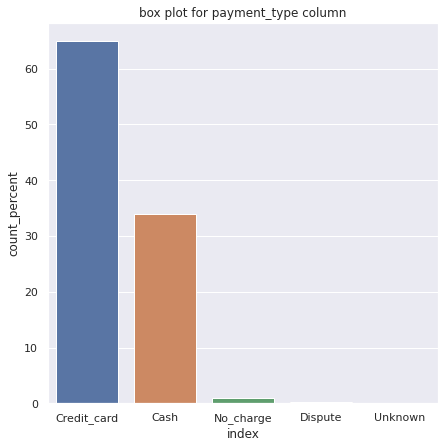

In [54]:
# now let's plot it as bar chart
# first step - create fig, ax object using plt.subplots
fig,ax = plt.subplots(figsize=(7,7))
# second step - use sns.barplot(x, y , data, ax) for plotting bar plot
sns.barplot(x = 'index', y = 'count_percent', data=payment_type_category_count,ax=ax)
# third step - use ax object to change plot properties - here we set a title with ax.set_title()
ax.set_title('box plot for payment_type column')
# third step - seaborn style setting
sns.set()
# fourth step - use plt.show() for showing the plots
plt.show()

From above we can understand that most of the payments are done through cash and credit cards. The proportion of credit card payments is around 70%.

Now we look into time based categorical variables.<br>
* 'trip_pickup_hour'
* 'trip_dropoff_hour'
* 'trip_day'


Number of categories in feature trip_pickup_hour is 24


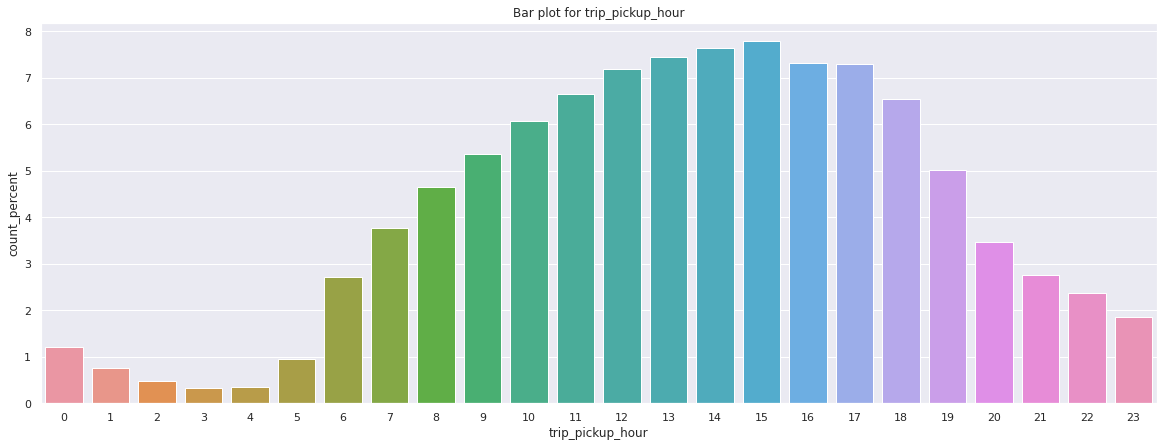

Number of categories in feature trip_dropoff_hour is 24


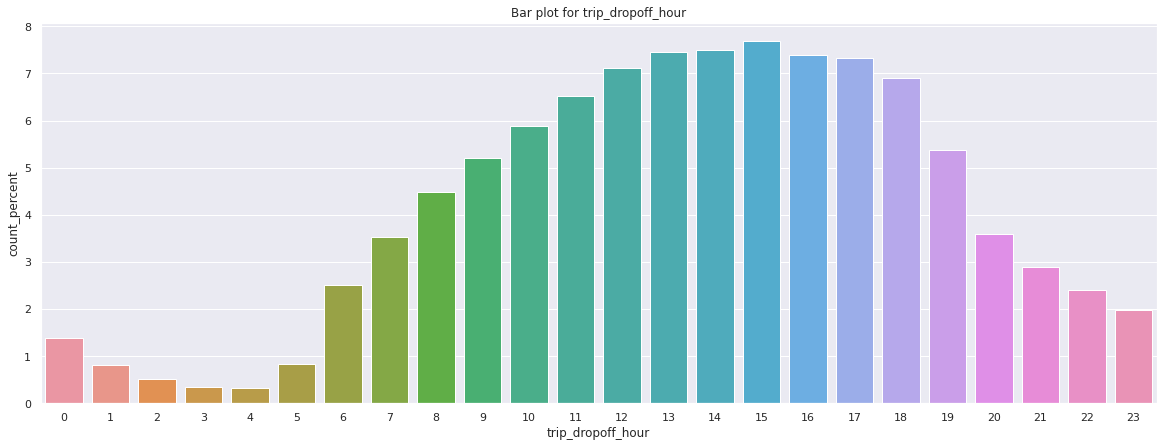

Number of categories in feature trip_day is 7


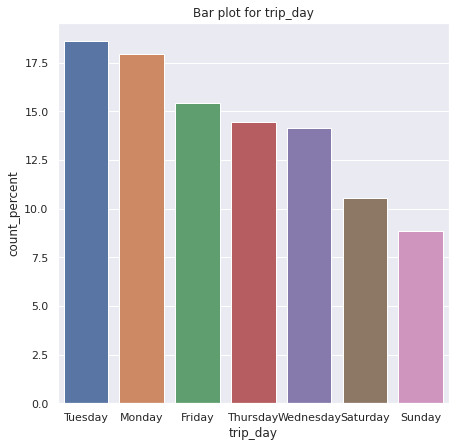

In [55]:
# now let's plot all the time based categorical variables in this way using a for loop
for feature in ['trip_pickup_hour','trip_dropoff_hour','trip_day']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature '+ feature + ' is ' + str(feature_value_counts.shape[0]))
    # Create fig,ax object using plt.subplots 
    if feature_value_counts.shape[0]<10:
        fig,ax = plt.subplots(figsize=(7,7))
    else:
        fig,ax = plt.subplots(figsize=(20,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    # set_title
    ax.set_title('Bar plot for '+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

Based on above plots we can observe following things
* Trip Hour 
    * the dropoff and pick up hour distribution looks almost same, it is because the trip duration in most of the cases is less than an hour with the median duration value as 10 min. 
    * Peak hour for the pick up and drop off is around evening from 6AM to 12PM . The busiest time is 3:00 PM.
    * there is less traffic during night times and only after 6AM in morning does the pickup and drop off starts picking up pace.
* Trip day
    * Sunday has the lowest taxi uses.
    * Tuesday & Moday has nearly same heavy taxi uses.
    * Friday, Thurday & Wednesday has nearly similar taxi uses
    * Saturday has bit more taxi use than Sunday

Moving on we will explore the distribution of location based features:<br>
* 'PULocationID'
* 'DOLocationID'

In [56]:
# let's see the number of categories available in both pickup and dropoff location - PULocationID and DOLocationID
print(trip_data['PULocationID'].value_counts().shape)
print(trip_data['DOLocationID'].value_counts().shape)

(252,)
(259,)


So we have around 260 categories for location. To plot it on bar plots we need to increase the figure size.


Number of categories in feature PULocationID is 259


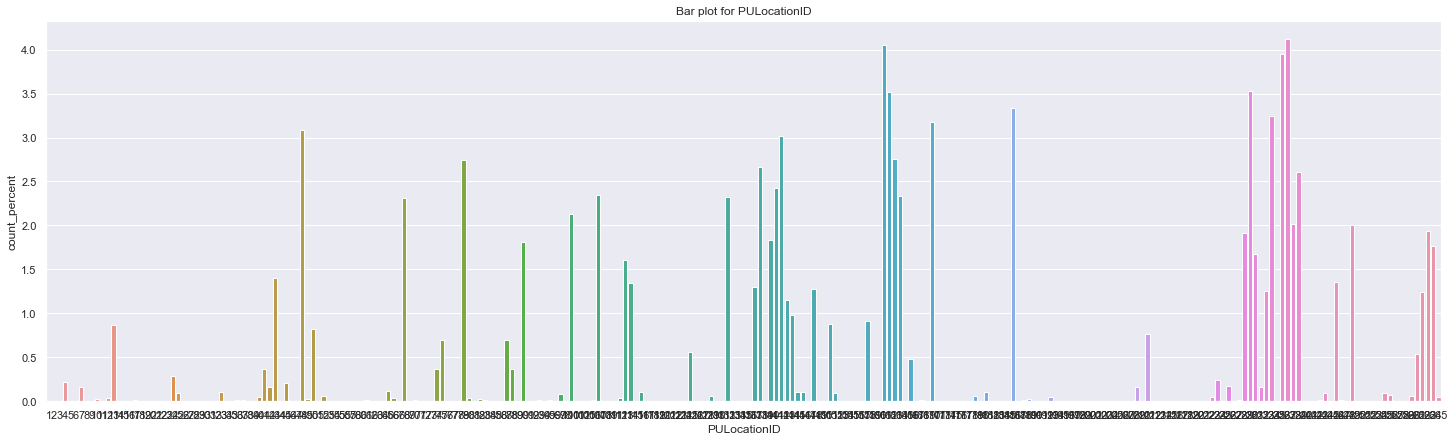

Number of categories in feature DOLocationID is 261


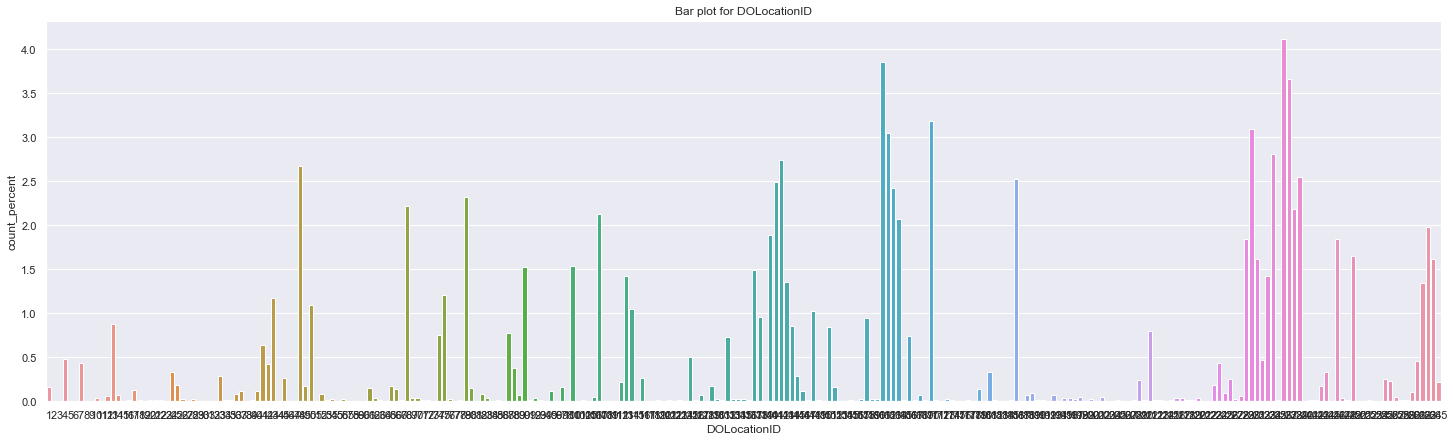

In [ ]:
for feature in ['PULocationID','DOLocationID']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature '+ feature + ' is ' + str(feature_value_counts.shape[0]))
    # Create fig,ax object using plt.subplots 
    fig,ax = plt.subplots(figsize=(25,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    # set_title
    ax.set_title('Bar plot for '+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

The above plots looks quite messy but one insight that we can indetify from above plot that most of pickup and dropoff points do not have more 0.5% traffic (0.5 percent of 8755612 total trips is 43778).

So in our next plot we will filter out these pickup and dropoff points to look into the graph more clearly.

Number of categories in feature PULocationID above 0.5 % count is 42


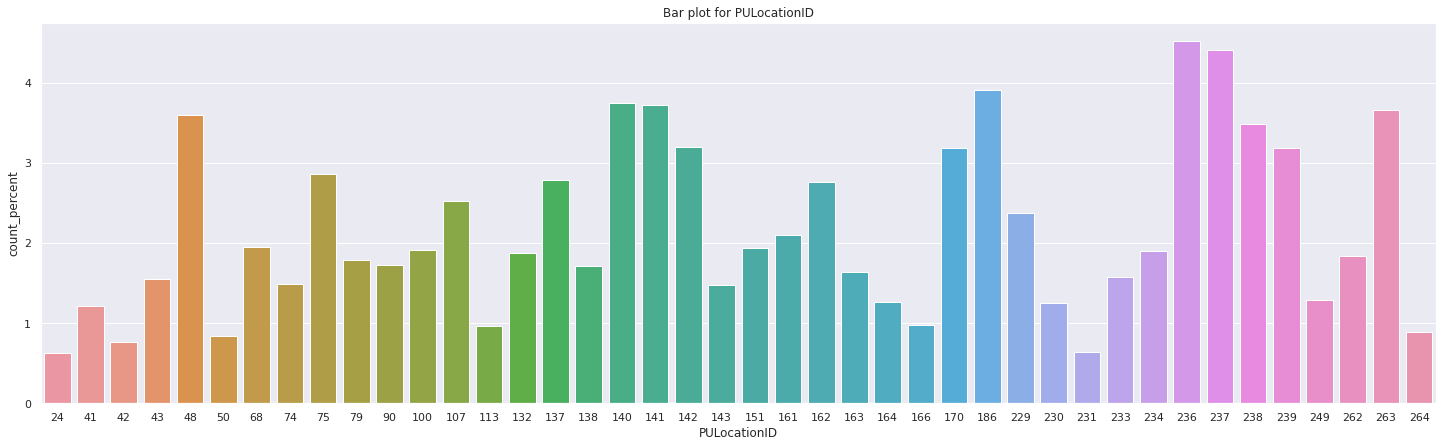

Number of categories in feature DOLocationID above 0.5 % count is 47


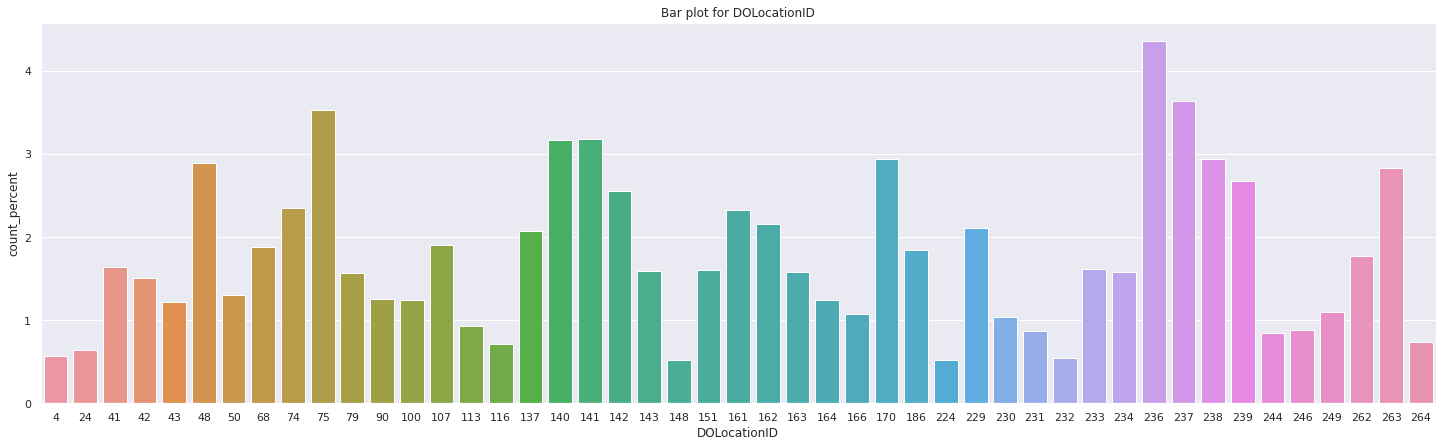

In [57]:
for feature in ['PULocationID','DOLocationID']:
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # filter only those location which has more than 0.5 % of traffic
    feature_value_counts = feature_value_counts.loc[feature_value_counts['count_percent']>=0.5]
    print('Number of categories in feature '+ feature + ' above 0.5 % count is ' + str(feature_value_counts.shape[0]))
    fig,ax = plt.subplots(figsize=(25,7))
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    ax.set_title('Bar plot for '+ feature)
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

From the above plots we can glance following insights<br>
* The busiest location in terms of pickup are 186, 236 and 237
* The busiest location for dropoff too are 75, 236 and 237.

We can also look for routes which are busiest. 

For exploring busy routes we need to create a new route column which is a combination of pickup and dropoff point.

So route = 'PULocationID'-'DULocationID'

In [58]:
# create routes column using PULocationID and DOLocationID with lambda function
trip_data['routes'] = trip_data.apply(lambda x: str(x['PULocationID'])+'-'+str(x['DOLocationID']),axis=1)

In [59]:
# print the first five rows of routes data
trip_data['routes'].head()

0     140-68
1     79-226
2    238-116
3    141-116
4     186-75
Name: routes, dtype: object

Since the above code takes a lot of time to execute we will import already created routes data based on the above code and then merge it with the trip_data dataframe.

In [60]:
# save routes data to csv to load it later for analysis
trip_data['routes'].to_csv('/content/drive/MyDrive/Data Science by Onelearn/EDA/Taxi Data Analysis/yellow_taxi_data_Jun2020_cleaned.csv',index=False)

In [62]:
# loading routes_data
file_loc_routes_data = '/content/drive/MyDrive/Data Science by Onelearn/EDA/Taxi Data Analysis/yellow_taxi_data_Jun2020_cleaned.csv'
routes_data = pd.read_csv(file_loc_routes_data)
# assigning new column 'routes' in trip_data to routes_data
trip_data['routes'] = routes_data

In [ ]:
trip_data.head()

tpep_pickup_datetime tpep_dropoff_datetime  ...  total_taxes   routes
0  2018-01-01 00:21:05   2018-01-01 00:24:23  ...          1.3    41-24
1  2018-01-01 00:44:55   2018-01-01 01:03:05  ...          1.3  239-140
2  2018-01-01 00:08:26   2018-01-01 00:14:21  ...          1.3  262-141
3  2018-01-01 00:20:22   2018-01-01 00:52:51  ...          1.3  140-257
4  2018-01-01 00:09:18   2018-01-01 00:27:06  ...          1.3  246-239

[5 rows x 17 columns]

Now let's explore routes through the same bar plot code that we used for Location ID's. But in this case we will only look for routes with more than 0.25% counts (21889 trips).

Number of categories in feature routes above 0.25 % count is 23


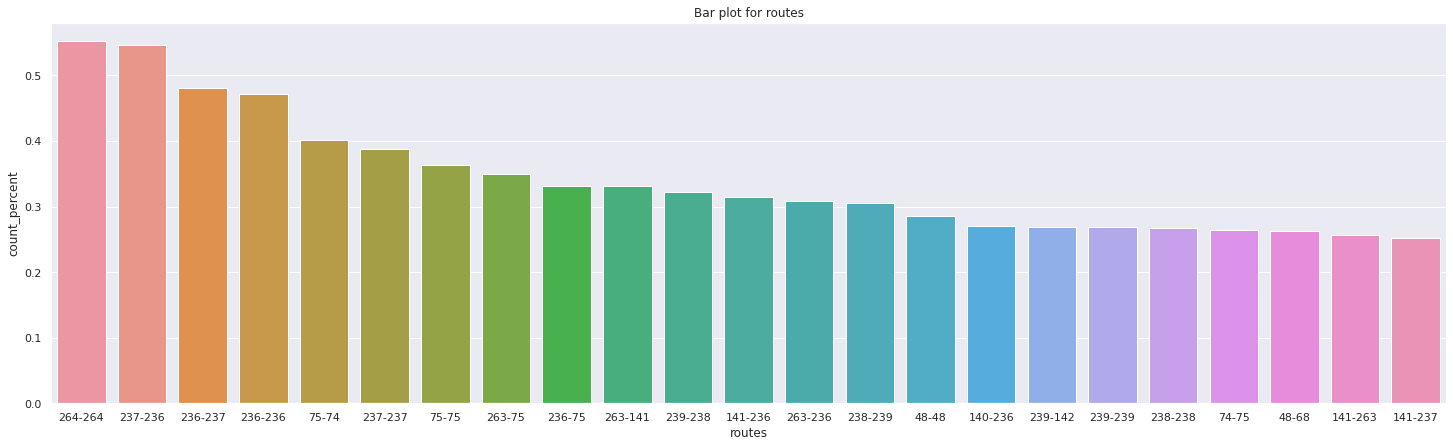

In [63]:
# plot bar plot for routes which have trip count above 0.25%
feature = 'routes'
feature_value_counts = trip_data[feature].value_counts().reset_index()
feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
# choosing routes where the trip percent is above 0.25% of total trips
feature_value_counts = feature_value_counts.loc[feature_value_counts['count_percent']>=0.25]
print('Number of categories in feature '+ feature + ' above 0.25 % count is ' + str(feature_value_counts.shape[0]))
fig,ax = plt.subplots(figsize=(25,7))
sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
ax.set_title('Bar plot for '+ feature)
ax.set_xlabel(feature)
sns.set()
plt.show()

From the above plot we can observe that 5 busiest route are following:<br>
264-264<br>
237-236<br>
236-237<br>
236-236<br>
75-74<br>



Finally we will look into the distribution of passenger_count

In [64]:
# look into value_counts of 'passenger_count'
trip_data['passenger_count'].value_counts()

1.0    386869
2.0     56950
3.0     14257
0.0     13302
5.0     11187
6.0      9045
4.0      4922
9.0         2
8.0         1
Name: passenger_count, dtype: int64

Here we see that the mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare.

**This is the result of some of the most important insights after doing univariate analysis:**<br>
* fare_amount  - most of the fare amount is within 8-9 dollar value as is shown by the median value 8.5 dollar. Though there are some significant outliers, the maximum of which is 941 dollars.


* tip_amount - most of the tip amount is within 1-2 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 422 dollars. 


* tolls_amount - most of the tolls_amount value is 0 so it seems most of the trips do not have to pay for tolls.


* total_taxes - most of the total_taxes values is within 1.3 dollars as is shown by the median value. Though we have outliers in this case but it is not as signiificant as the case for tip and fare. max value is 88


* total_amount - most of the total_amount values is within 13-14 dollars as is shown by the median value. Again the outliers in this case seems mostly because of outliers in fare_amount.


* duration - most of the values in duration is within 8.5 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 4497 minutes.


* trip_distance - most of the trip_distance is within 1.71 miles value as is shown by the median. The outlier in this case is very large value 22543


* Credit card is the most preferred mode of payment followed by cash.


* Trip Hour 
    * the dropoff and pick up hour distribution looks almost same, it is because the trip duration in most of the cases is less than an hour with the median duration value as 10 min. 
    * Peak hour for the pick up and drop off is around evening from 6AM to 12PM . The busiest time is 3:00 PM.
    * there is less traffic during night times and only after 6AM in morning does the pickup and drop off starts picking up pace.
* Trip day
    * Sunday has the lowest taxi uses.
    * Tuesday & Moday has nearly same heavy taxi uses.
    * Friday, Thurday & Wednesday has nearly similar taxi uses
    * Saturday has bit more taxi use than Sunday

* The busiest location in terms of pickup and dropoff are 75, 236 and 237.


* Four of the busiest routes are - 
264-264
237-236
236-237
236-236
75-74


* Mostly 1 or 2 passenger avail the cab. Group rides are less common.

## **Bivariate Analysis**

Remember that we made some analysis points regarding exploration of duration and pricing:<br>

For pricing we will be exploring it's relationship with:<br>
* hour/day of trip 
* pickup location of trip

For duration we will be exploring it's relationship with:<br>
* hour of day 
* pickup location of trip


**PRICING EXPLORATION**

We have following variables in the dataset that is associated with pricing:<br>
* fare_amount
* tip_amount
* total_taxes
* tolls_amount
* total_amount

In our anlaysis for now we will be focussing on:<br>
* fare_amount
* tip_amount
* total_taxes
* total_amount

we are leaving tolls_amount for now from our analysis as it contributes very little to the total_amount value because it's median value was 0 i.e. most of the trips are not paying tolls_amount.


*** PRICING VARIABLE EXPLORATION WITH HOUR/DAY OF TRIP ***<br>
All of our pricing variables are continuous and Hour/Day is categorical.

The way to explore relationship between a continuous variable and categorical variable is through a box plot. We create box plot for each category of categorical variable so as to see how the distribution changes for the continuous variables as the category values changes for categorical variable.

We will start with fare_amount exploration.

Let's do a box plot of fair_amount with hour/day of trip to see how the fare changes for different hours of the day and for different days of the week

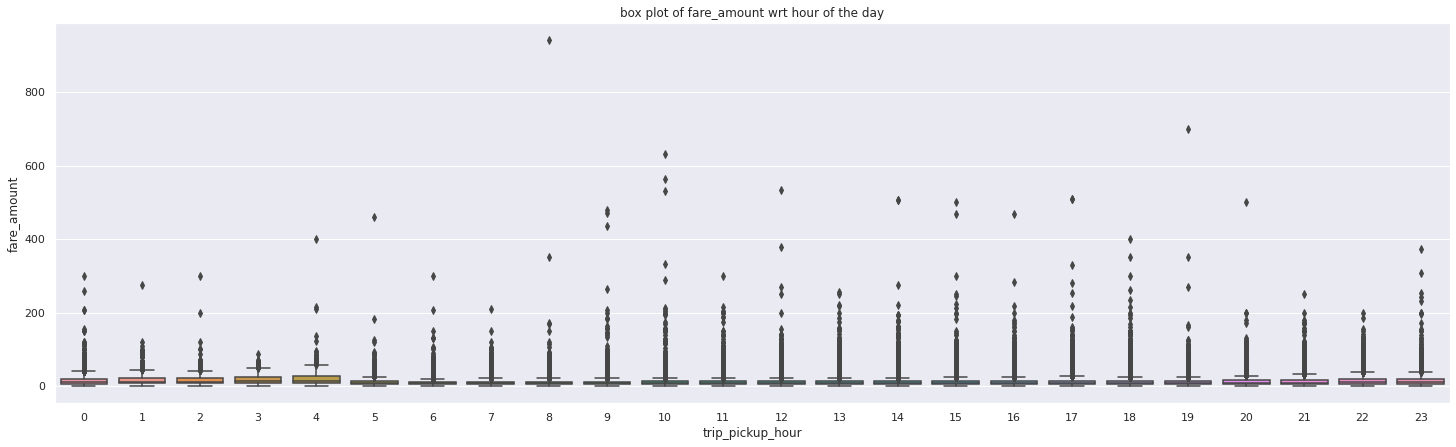

In [65]:
# fig,ax object using plt.subplots()
fig,ax = plt.subplots(figsize=(25,7))
# box plot using - sns.boxplot(x, y , data, ax)
sns.boxplot(x = 'trip_pickup_hour',y='fare_amount',data=trip_data,ax=ax)
# ax.set_title
ax.set_title('box plot of fare_amount wrt hour of the day')
# seaborn style setting
sns.set()
# matplotlib plt.show()
plt.show()

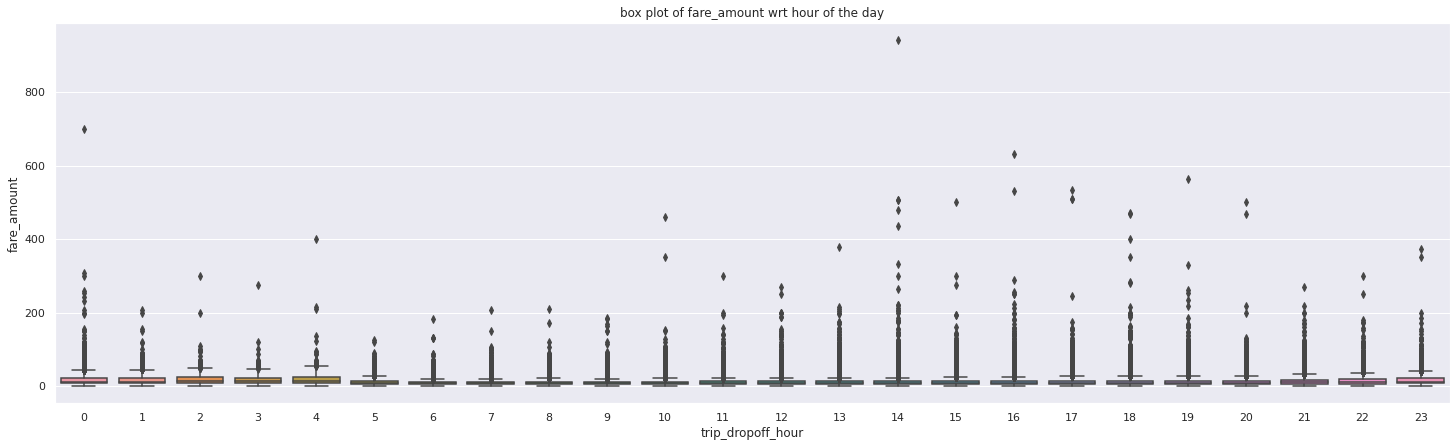

In [67]:
# fig,ax object using plt.subplots()
fig,ax = plt.subplots(figsize=(25,7))
# box plot using - sns.boxplot(x, y , data, ax)
sns.boxplot(x = 'trip_dropoff_hour',y='fare_amount',data=trip_data,ax=ax)
# ax.set_title
ax.set_title('box plot of fare_amount wrt hour of the day')
# seaborn style setting
sns.set()
# matplotlib plt.show()
plt.show()

From the above plot we can observe that most of the outliers in fare happens during 15 or 3PM to 19 or 7PM based on pickup time.

Based on dropoff time, we have heavy outliers in the morning as well as evening.

For observing the distribution in a better way we would restrict the fare_amount to below 50 dollars. 

In [68]:
trip_data = trip_data.loc[trip_data['fare']]

KeyError: ignored

In [22]:
# restricted_fare_amount_data dataframe formation by filtering fare_amount less than 50 dollars
restricted_fare_amount_data = trip_data.loc[(trip_data['fare_amount']<=50) & (trip_data['fare_amount']>=0)]
restricted_fare_amount_data.shape

(486965, 17)

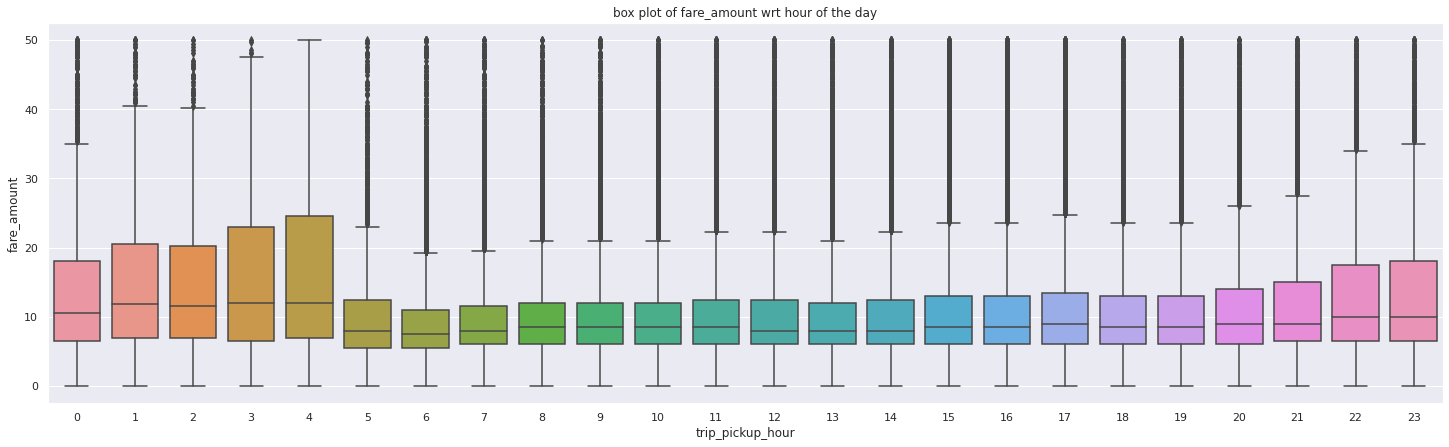

In [70]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day')
sns.set()
plt.show()

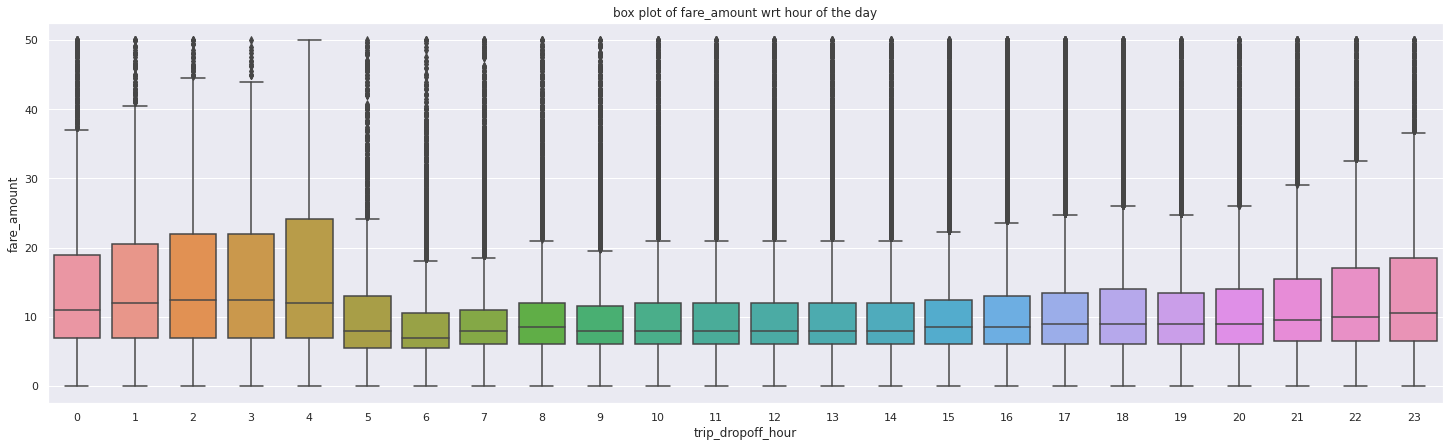

In [71]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day')
sns.set()
plt.show()

In [25]:
#df = px.data.tips()
fig = px.box(restricted_fare_amount_data,x ='trip_dropoff_hour',y='fare_amount')
fig.show()

We can see from the plots that trip pickup and dropoff hours do not have much affect on median fare_amount as median is almost same for all the hours.

let's us see if hour of day has any effect on other pricing related variables or not.

Starting with total_amount

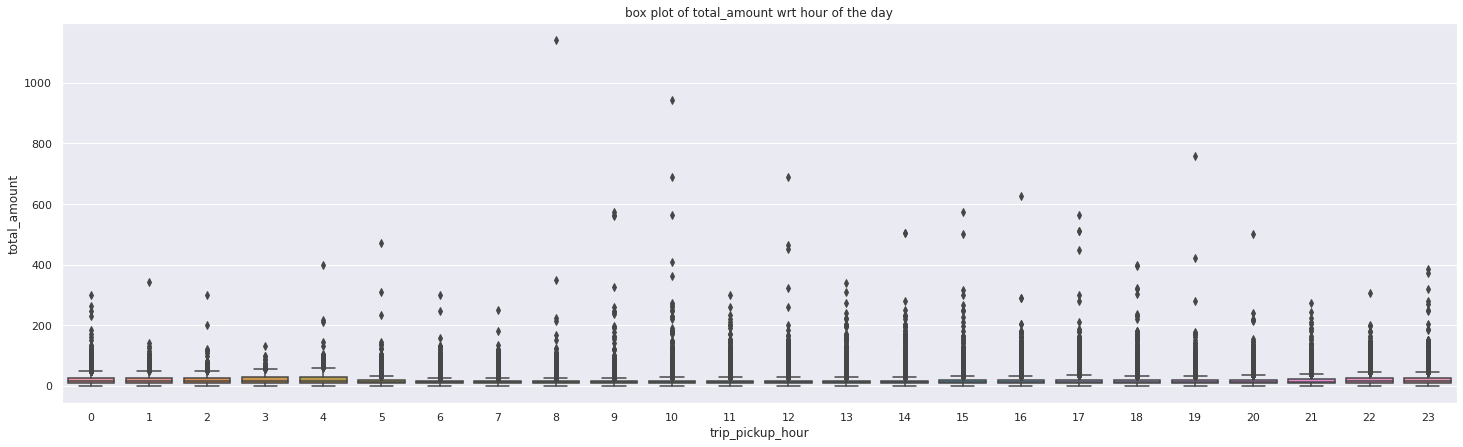

In [72]:
fig,ax = plt.subplots(figsize=(25,7))
# sns.boxplot changes
sns.boxplot(x = 'trip_pickup_hour',y='total_amount',data=trip_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

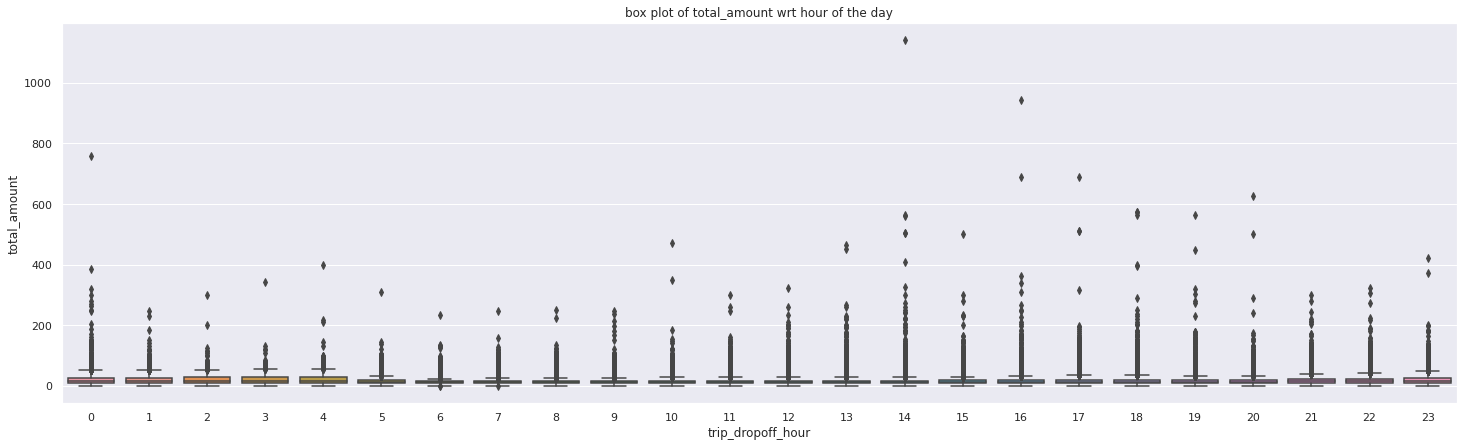

In [73]:
fig,ax = plt.subplots(figsize=(25,7))
# sns.boxplot changes
sns.boxplot(x = 'trip_dropoff_hour',y='total_amount',data=trip_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

Again here since we are plotting full range of total_amount our graph is able to show heavy outliers prominently but not the distribution of general cases.

So we will again build a dataframe for total_amount with restricted values less than 50 dollars

In [74]:
# restricted_total_amount_data for filtering total_amount data to less than 50 dollars
restricted_total_amount_data = trip_data.loc[trip_data['total_amount']<=50]
restricted_total_amount_data.shape

(482454, 18)

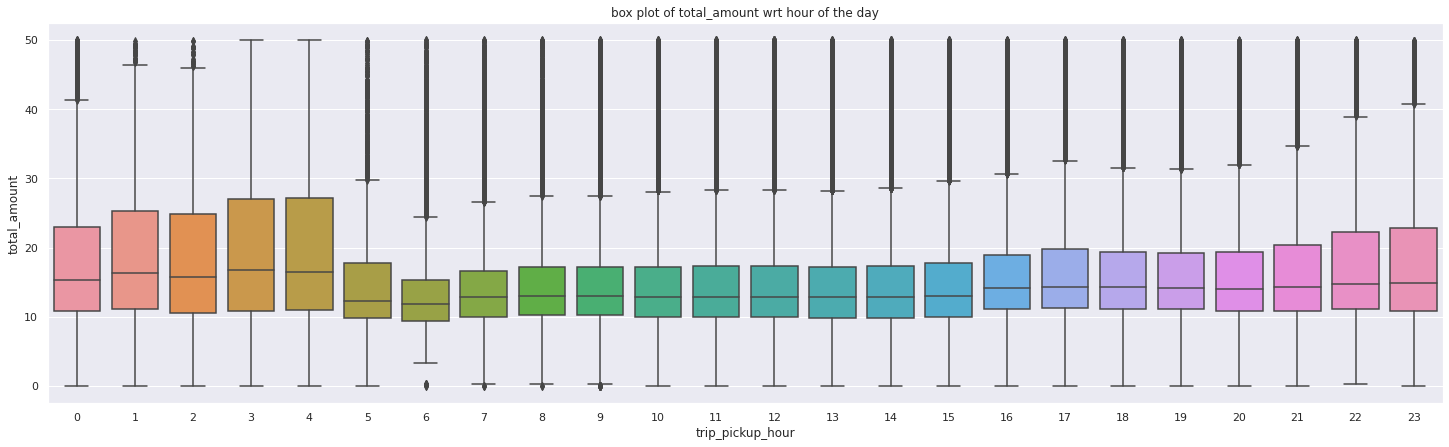

In [75]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='total_amount',data=restricted_total_amount_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

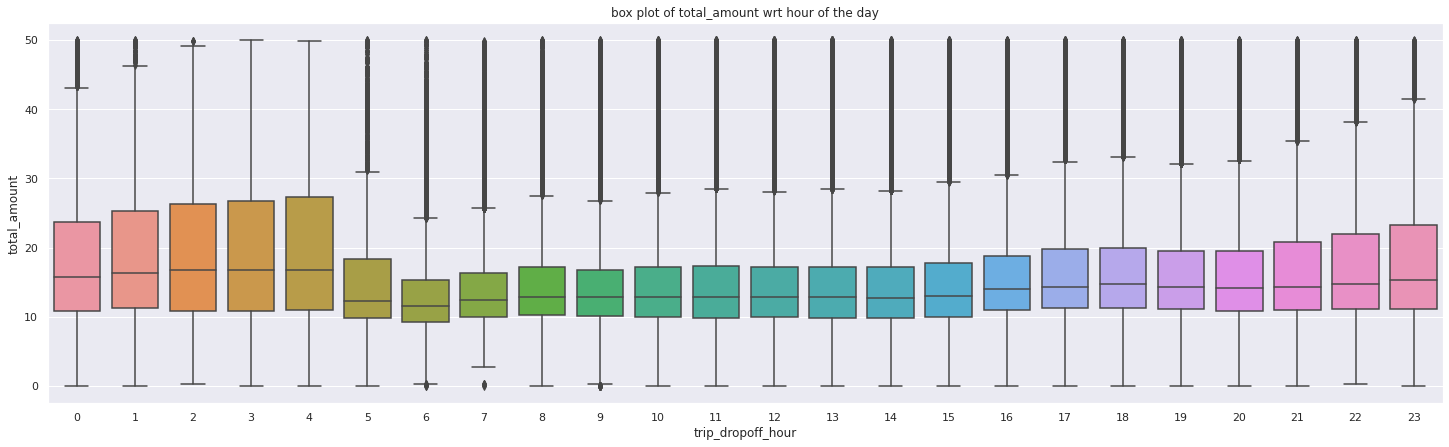

In [76]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='total_amount',data=restricted_total_amount_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

Again we can see the median value does not changes much for each hour though there is variability in price across the hours indicated by different sizes of boxes for different hours.

We will explore tip_amount and total_taxes now. But for exploring them we will retrict the values for these variables to below 10 dollars because the median value for tip_amount was around 1-2 dollars while for total_taxes was around 0.8 dollars so if to see the general distribution clearly we are restricting it to a range of 5 times the median value.

In [32]:
restricted_tip_amount_data = trip_data.loc[trip_data['tip_amount']<10]
restricted_total_taxes_data = trip_data.loc[trip_data['total_taxes']<10]

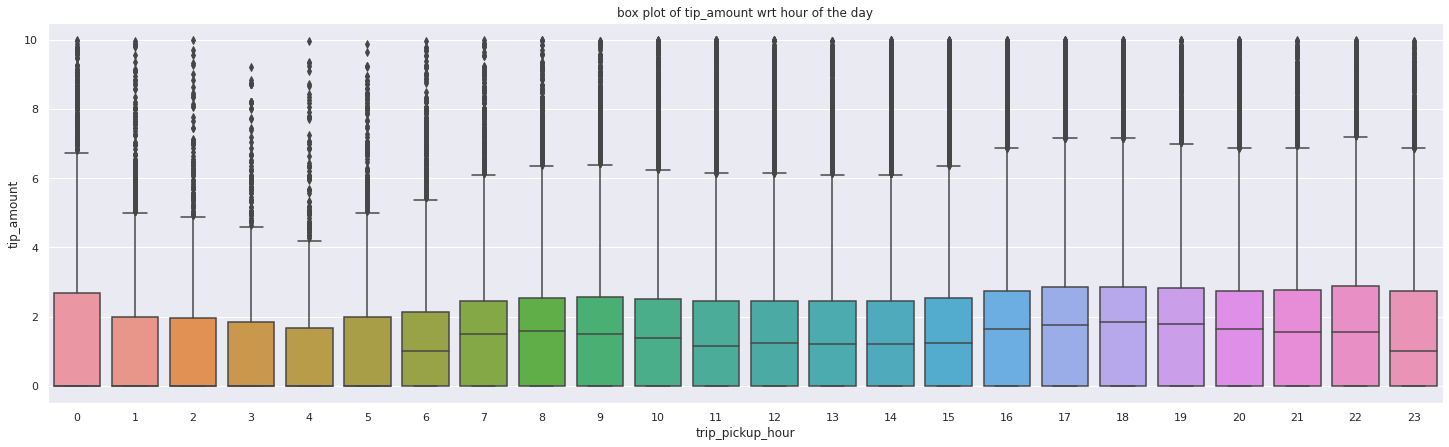

In [78]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day')
sns.set()
plt.show()

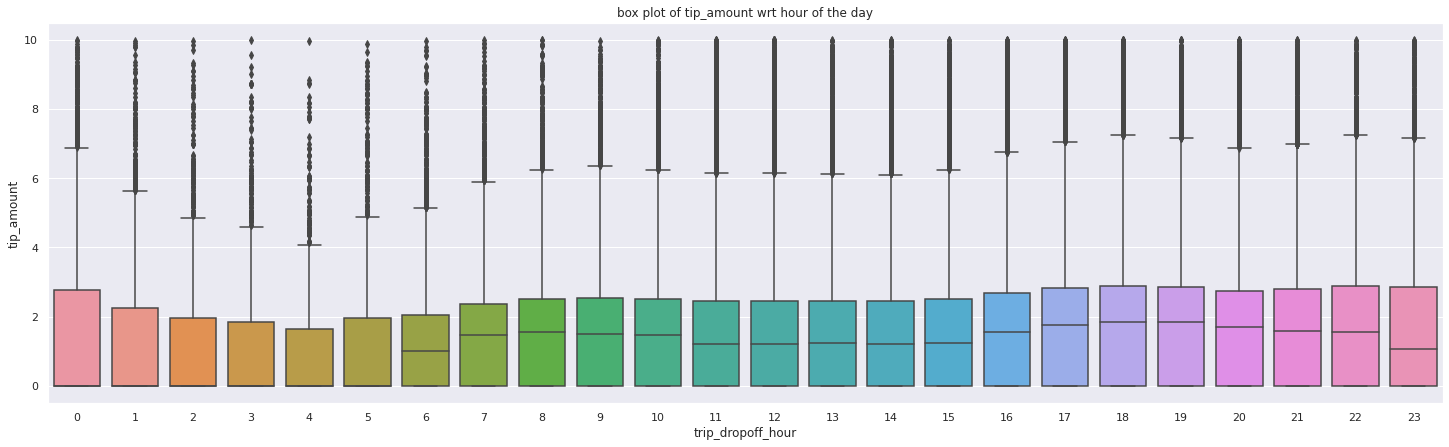

In [79]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day')
sns.set()
plt.show()

Based on tip_amount plot we can see that tip_amount too does not vary much based on hours.

Let's observe total_taxes now

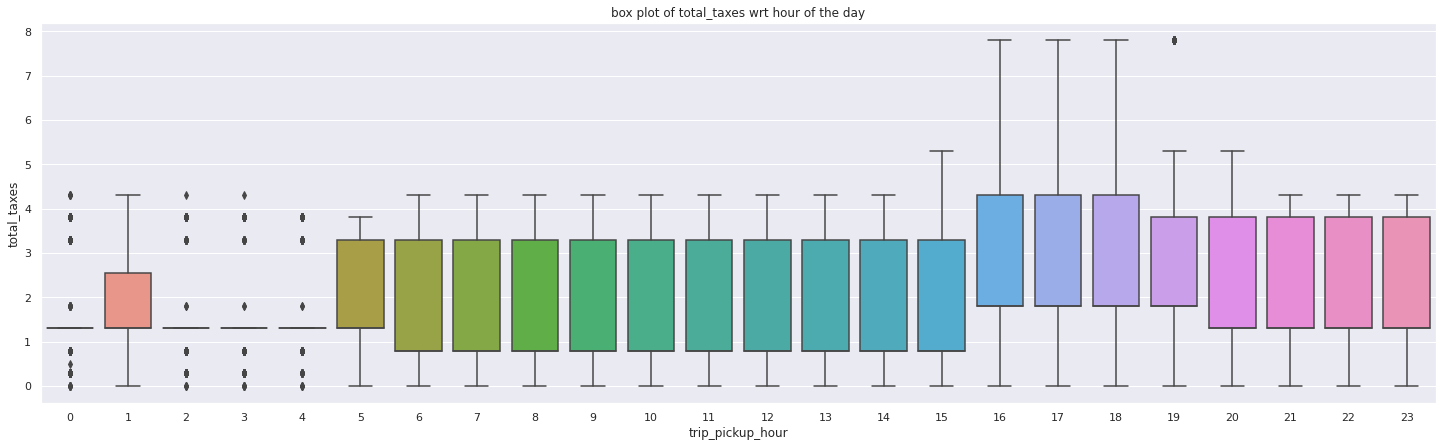

In [80]:
# total_taxes = extra + improvement_surcharges + Mta

fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='total_taxes',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day')
sns.set()
plt.show()

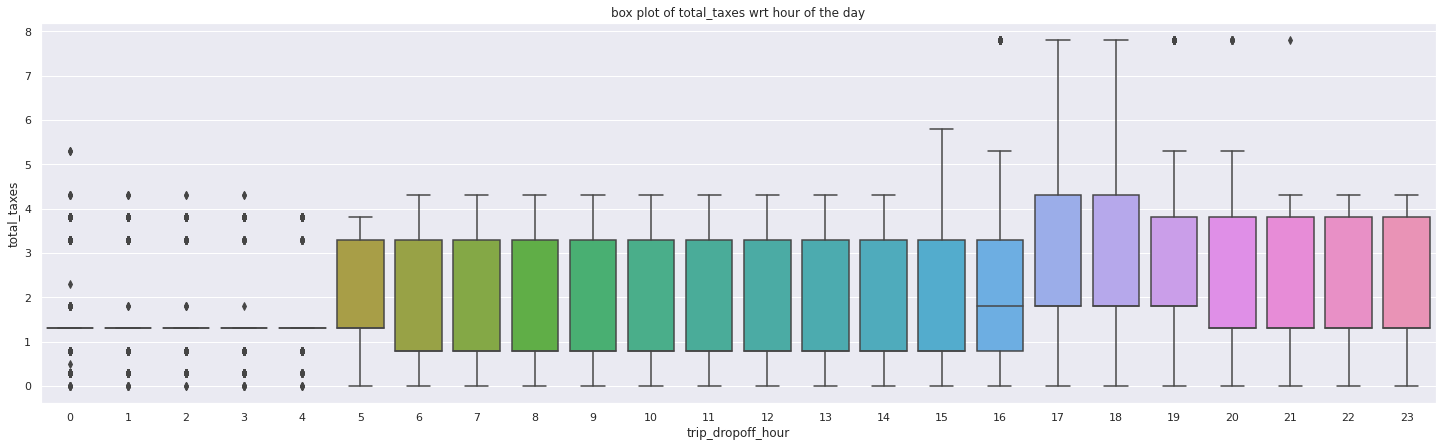

In [81]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='total_taxes',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day')
sns.set()
plt.show()

**Now in this plot we can clearly observe that total_taxes change significantly with hour of the day. There are two patterns that we can observe here:**<br>
* from the hour 8PM to 5AM the median taxes seem to be a bit higher than other hours, it may be due to some overnight surcharges.
* Evening from 4PM to 7PM have quite variable taxes and is a bit higher than other times, it may be due to higher traffic charges.

Overall the effect of hour of day is most clearly visible on total_taxes. we have two insights about how taxes change with hours
* Overnight charges are applied between 8PM to 5AM
* Evening has higher variability in taxes and the taxes are usually high.

Let's move and explore the distribution of pricing variables with respect to day of week. For this analysis we will be using restricited version of dataset that we built for fare_amount, total_amount, tip_amount and total_taxes.

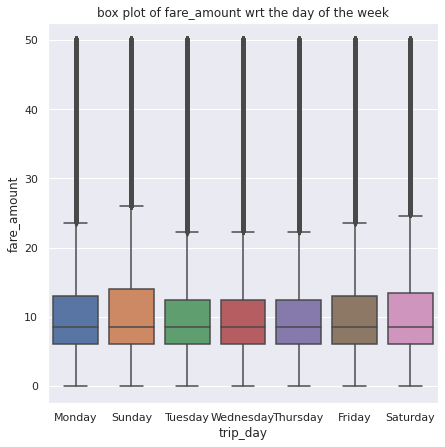

In [83]:
# plot of trip_day with fare_amount
fig,ax = plt.subplots(figsize=(7,7))
# changes in sns.boxplot x and y
sns.boxplot(x = 'trip_day',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt the day of the week')
sns.set()
plt.show()

In [36]:
fig = px.box(restricted_fare_amount_data, x = 'trip_day',y='fare_amount',
             notched=True, # used notched shape
             title="Box plot of total bill",
             #hover_data=["day"] # add day column to hover data
            )
fig.show()

TypeError: ignored

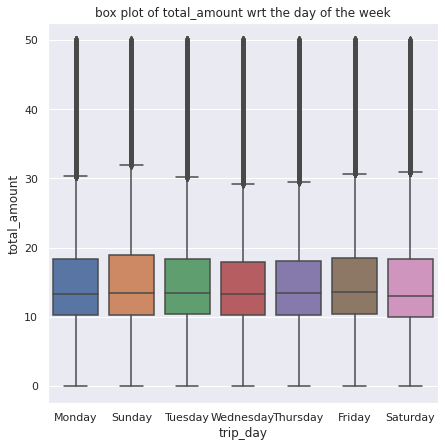

In [84]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='total_amount',data=restricted_total_amount_data,ax=ax)
ax.set_title('box plot of total_amount wrt the day of the week')
sns.set()
plt.show()

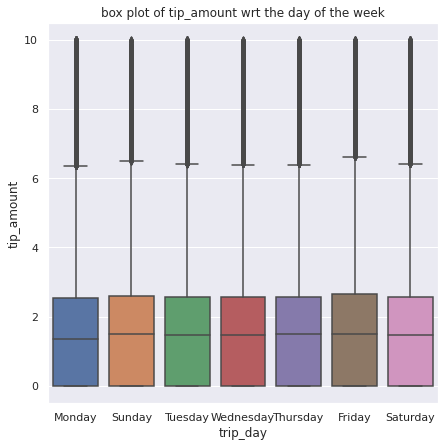

In [85]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt the day of the week')
sns.set()
plt.show()

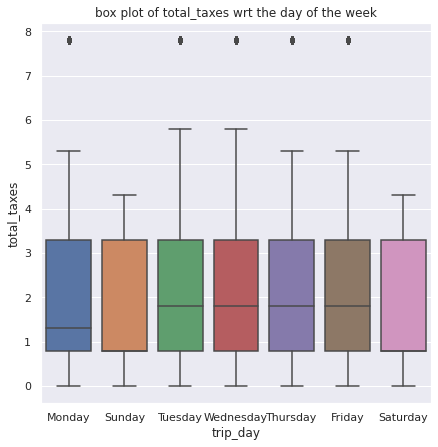

In [86]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='total_taxes',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt the day of the week')
sns.set()
plt.show()

We can see that pricing overall does not change much with respect to day of week.

*** PRICING VARIABLE EXPLORATION WITH LOCATION OF TRIP ***<br>

Here we will look into the price changes for the most frequent trip pickup locations.

In [87]:
# create a new series using value_counts() on 'PULocationID'
pickup_location_value_counts = trip_data['PULocationID'].value_counts()
# show the series
pickup_location_value_counts.head()

236    22457
237    21878
186    19428
140    18589
141    18490
Name: PULocationID, dtype: int64

In [88]:
# top 10 frequent pickup locations using .nlargest(10).index
top_10_frequent_pickup_locations = pickup_location_value_counts.nlargest(10).index
top_10_frequent_pickup_locations

Int64Index([236, 237, 186, 140, 141, 263, 48, 238, 142, 170], dtype='int64')

The median fare_amount of trips taken from 236 is 7.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


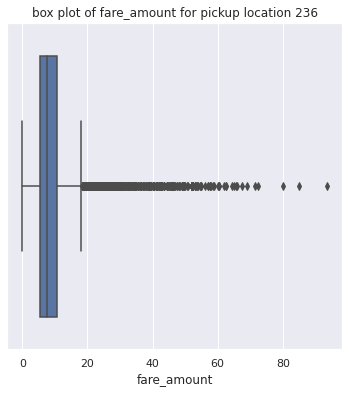

The median fare_amount of trips taken from 237 is 7.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


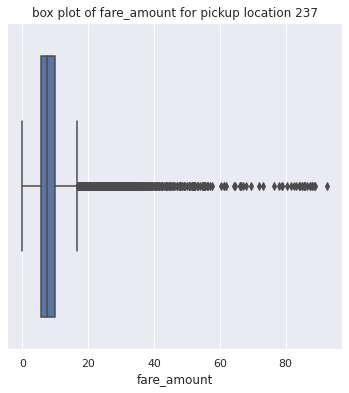

The median fare_amount of trips taken from 186 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


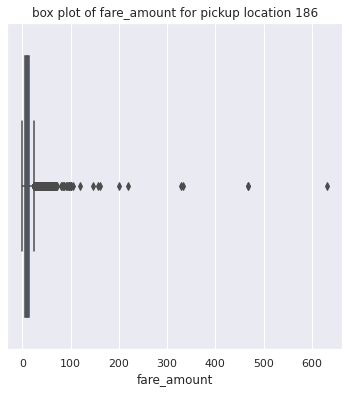

The median fare_amount of trips taken from 140 is 9.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


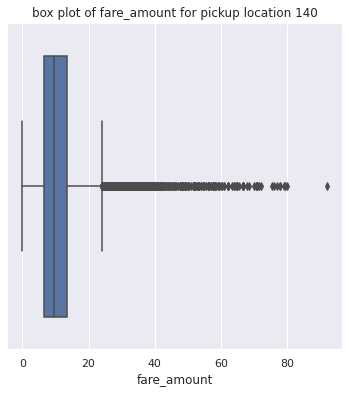

The median fare_amount of trips taken from 141 is 8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


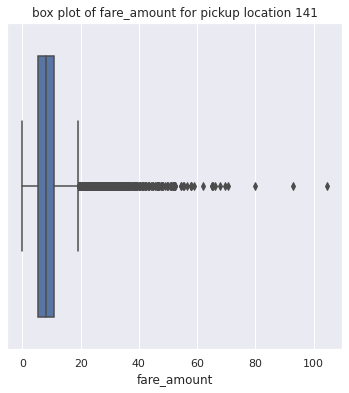

The median fare_amount of trips taken from 263 is 8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


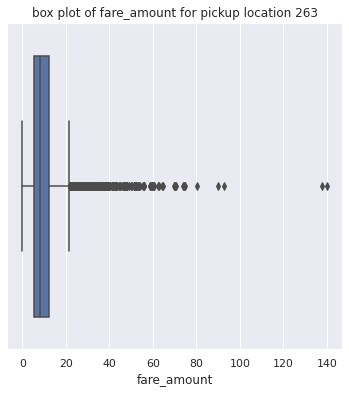

The median fare_amount of trips taken from 48 is 8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


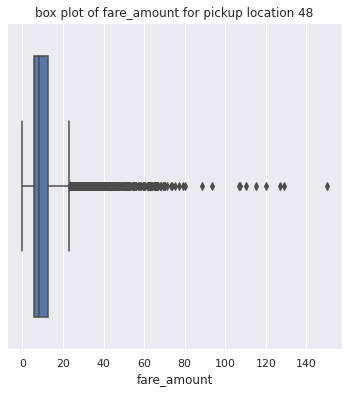

The median fare_amount of trips taken from 238 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


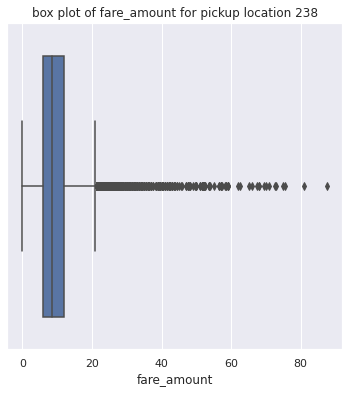

The median fare_amount of trips taken from 142 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


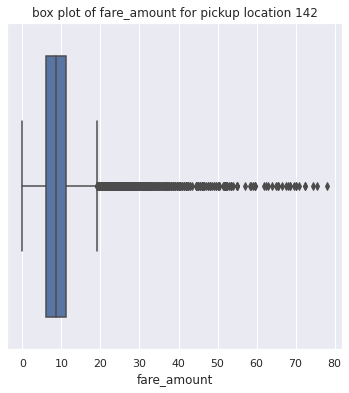

The median fare_amount of trips taken from 170 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


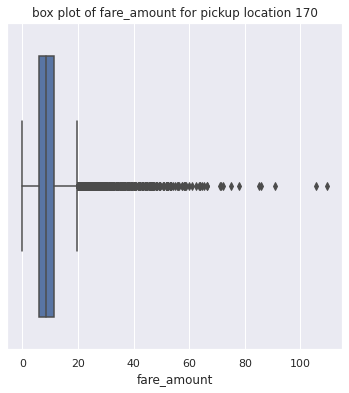

In [89]:
# for loop for plotting box plot of each of the top 10 frequent pickup locations
for top_pickup_locID in top_10_frequent_pickup_locations:
    # create the new dataframe for each location using .loc on 'PULocationID' - pickup_locID_dataframe
    pickup_locID_dataframe = trip_data.loc[trip_data['PULocationID'] == top_pickup_locID]
    # print the median fare_amount for the top_pickup_locID
    print('The median fare_amount of trips taken from '+str(top_pickup_locID)+' is '+str(pickup_locID_dataframe['fare_amount'].median()))
    # fig,ax object
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of fare_amount from the dataframe pickup_locID_dataframe
    sns.boxplot(pickup_locID_dataframe['fare_amount'],ax=ax)
    # set_title
    ax.set_title('box plot of fare_amount for pickup location '+ str(top_pickup_locID))
    sns.set()
    plt.show()

So from above plot we can observe that for one of the most busiest pickup location median fare_amount is quite low in comparison to other busy locations. Though the outliers for pickup location 237 is high.

This could be helpful in adjusting our revenue expectation based on putting our cabs in a given location because just choosing busy pickup locations for higher revenue won't work, we may have to choose locations taking into consideration both busy traffic and higher median fare_amount.

**DURATION EXPLORATION**

Here we will explore the duration of trip exploration with pickup hour of day.

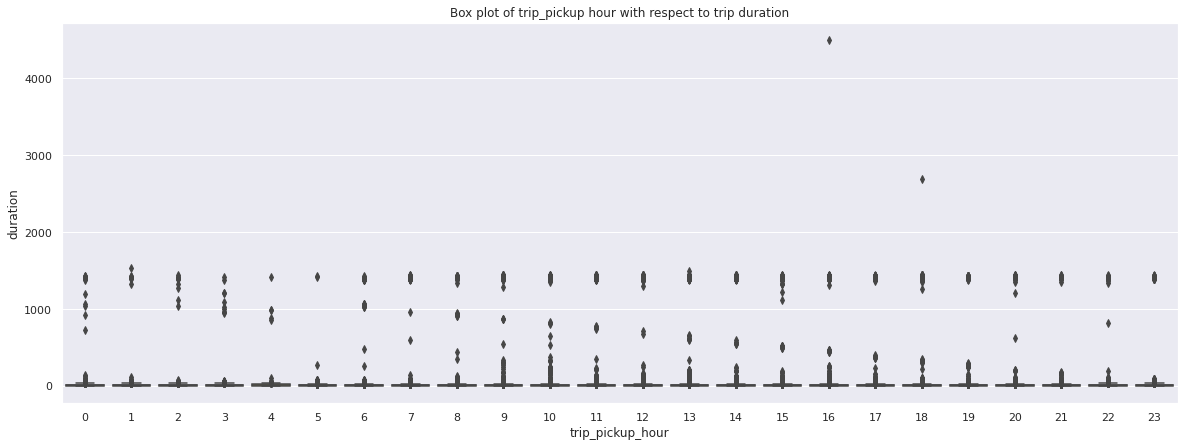

In [90]:
# plot box plot for duration for different hours of day
fig,ax = plt.subplots(figsize=(20,7))
# box plot using sns.boxplot x is 'trip_pickup_hour' and y is 'duration'
sns.boxplot(x = 'trip_pickup_hour', y='duration',data = trip_data,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration')
sns.set()
plt.show()

Here again due to heavy outliers in duration data we are not able to observe the general graph. we might need to restrict our duration values to within 50min. 

In [91]:
# create restricted_duration dataframe with .loc on 'duration' column
restricted_duration= trip_data.loc[trip_data['duration']<50]
restricted_duration.shape

(491903, 18)

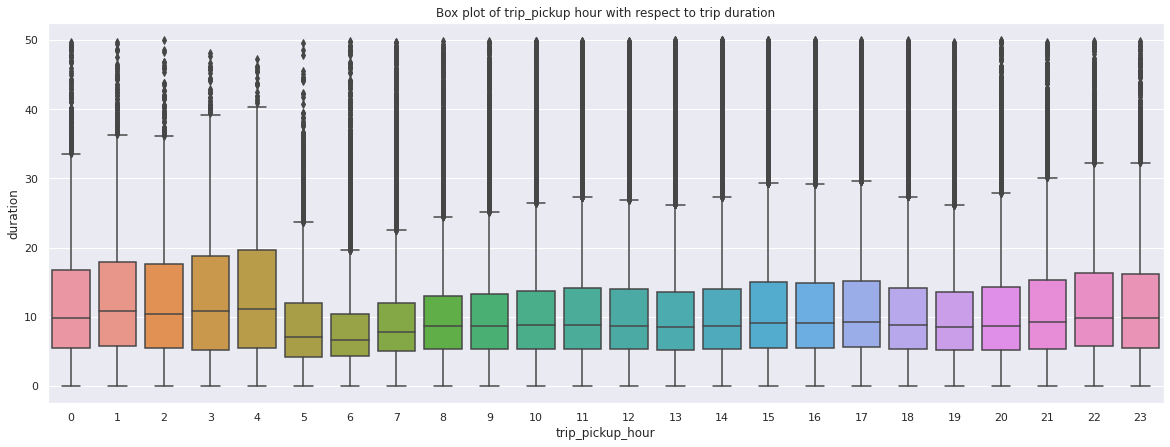

In [92]:
fig,ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = 'trip_pickup_hour', y='duration',data = restricted_duration,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration')
sns.set()
plt.show()

Early morning hours of 5AM to 6AM have shorter duration trips

Let's also explore duration with respect to top pickup location.

The median trip duration of trips taken from 236 is 7.616666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


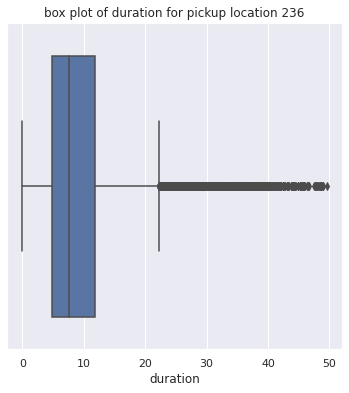

The median trip duration of trips taken from 237 is 7.15


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


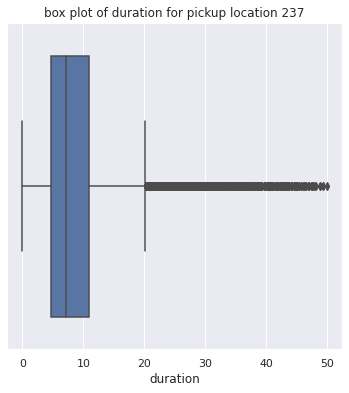

The median trip duration of trips taken from 186 is 8.883333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


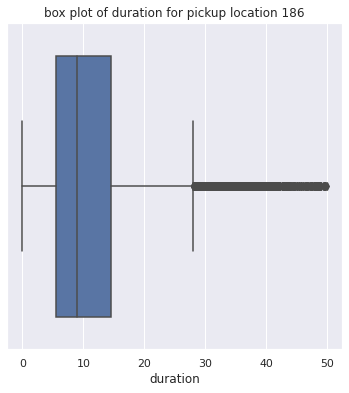

The median trip duration of trips taken from 140 is 9.65


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


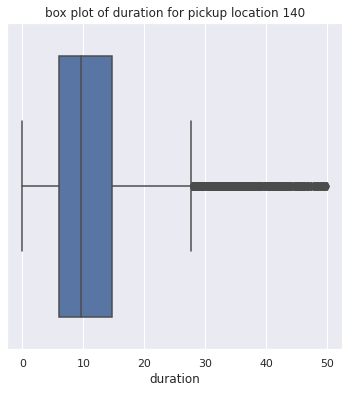

The median trip duration of trips taken from 141 is 7.65


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


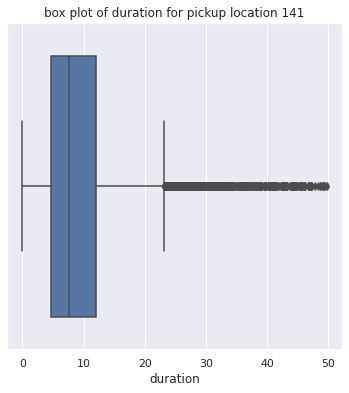

The median trip duration of trips taken from 263 is 7.75


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


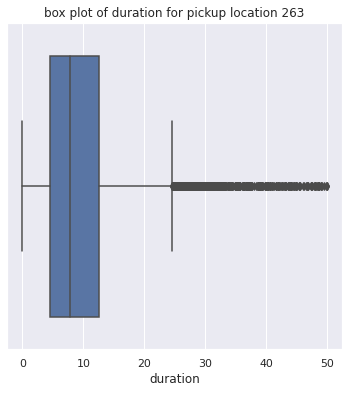

The median trip duration of trips taken from 48 is 8.033333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


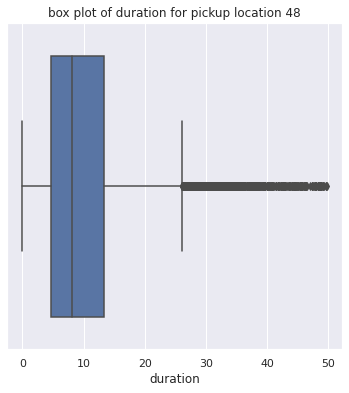

The median trip duration of trips taken from 238 is 8.566666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


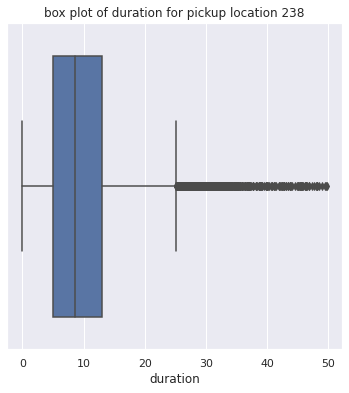

The median trip duration of trips taken from 142 is 8.333333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


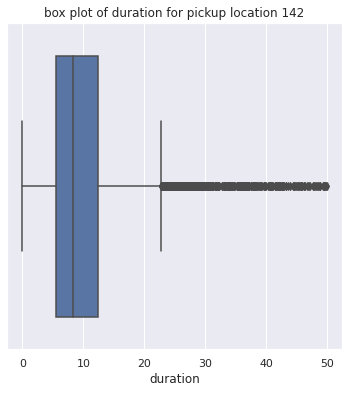

The median trip duration of trips taken from 170 is 8.416666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


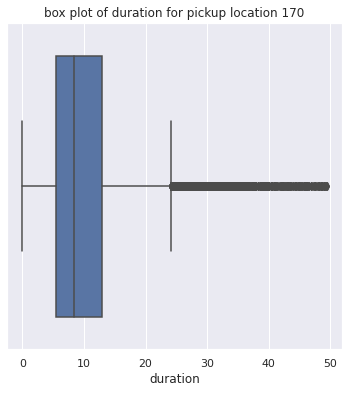

In [94]:
# plot box plots of duration for top 10 frequent pickup locations
for top_pickup_locID in top_10_frequent_pickup_locations:
    # create the new dataframe for each location using .loc on 'PULocationID' - pickup_locID_dataframe
    pickup_locID_dataframe = restricted_duration.loc[trip_data['PULocationID'] == top_pickup_locID]
    # print the median duration for the top_pickup_locID
    print('The median trip duration of trips taken from '+str(top_pickup_locID)+' is '+str(pickup_locID_dataframe['duration'].median()))
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe pickup_locID_dataframe
    sns.boxplot(pickup_locID_dataframe['duration'],ax=ax)
    # set_title
    ax.set_title('box plot of duration for pickup location '+ str(top_pickup_locID))
    sns.set()
    plt.show()

Here again we can see for the most frequent pickup location 237 the duration value is less in comparison to other pickup locations, though 236 as well has lower duration amount close to 8 min. this might be the reason for less fare_amount as well.

## FINAL RESULTS FROM EDA

Following insights would be useful for our company's product launch in New York
**This is the result of some of the most important insights after doing univariate analysis:**<br>
* fare_amount  - most of the fare amount is within 8-9 dollar value as is shown by the median value 8.5 dollar. Though there are some significant outliers, the maximum of which is 941 dollars.


* tip_amount - most of the tip amount is within 1-2 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 422 dollars. 


* tolls_amount - most of the tolls_amount value is 0 so it seems most of the trips do not have to pay for tolls.


* total_taxes - most of the total_taxes values is within 1.3 dollars as is shown by the median value. Though we have outliers in this case but it is not as signiificant as the case for tip and fare. max value is 88


* total_amount - most of the total_amount values is within 13-14 dollars as is shown by the median value. Again the outliers in this case seems mostly because of outliers in fare_amount.


* duration - most of the values in duration is within 8.5 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 4497 minutes.


* trip_distance - most of the trip_distance is within 1.71 miles value as is shown by the median. The outlier in this case is very large value 22543


* Credit card is the most preferred mode of payment followed by cash.


* Trip Hour 
    * the dropoff and pick up hour distribution looks almost same, it is because the trip duration in most of the cases is less than an hour with the median duration value as 10 min. 
    * Peak hour for the pick up and drop off is around evening from 6AM to 12PM . The busiest time is 3:00 PM.
    * there is less traffic during night times and only after 6AM in morning does the pickup and drop off starts picking up pace.
* Trip day
    * Sunday has the lowest taxi uses.
    * Tuesday & Moday has nearly same heavy taxi uses.
    * Friday, Thurday & Wednesday has nearly similar taxi uses
    * Saturday has bit more taxi use than Sunday

* The busiest location in terms of pickup and dropoff are 75, 236 and 237.


* Four of the busiest routes are - 
264-264
237-236
236-237
236-236
75-74


* Mostly 1 or 2 passenger avail the cab. Group rides are less common.


* From the hour 8PM to 5AM the median taxes seem to be a bit higher than other hours, it may be due to some overnight surcharges.


* Evening from 4PM to 7PM have quite variable taxes and is a bit higher than other times, it may be due to higher traffic charges.


* We discovered from the dataset that even for the busiest pickup location the median fare_amount is a bit lower than other busier pickup locations. So just choosing busy pickup locations for higher revenue won't work, we may have to choose locations taking into consideration both busy traffic and higher median fare_amount.


* Early morning hours of 5AM to 6AM have shorter duration trips


**FURTHER ANALYSIS**<br>
We can look into following for a followup analysis<br>
* We can increase the dataset size i.e. we can take the data for more months rather than just one month's data that we used in this analysis.

* We could analyse routes with fare_amount or total_taxes and duration for different time of the day.

* Prediction of fare_amount or total_taxes based on time and location.

* Prediction of duration based on time and location.

